In [1]:
import os
#import selenium
os.chdir("../../../LAA/")

In [103]:
# !pip uninstall scikit-learn -y --user
# !pip install scikit-learn==1.0.2 --user
# !pip install lightgbm --user
# !pip install eli5 --user
# !pip install scikit-optimize --user
# !pip install xgboost==1.2.0 --user
# !pip install tableone --user
# !pip install openpyxl --user
# !pip install -U yellowbrick --user
# !pip install matplotlib-venn --user
#!pip install venn
# !pip install --upgrade --force-reinstall venn
# !conda install --yes -c rapidsai -c nvidia -c conda-forge  cuml=22.04 cudf=22.04 --user
# !conda install --yes -c conda-forge screen --user

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from tableone import TableOne
import pandas as pd
pd.options.mode.chained_assignment = None
import scipy
from scipy import stats
# import cuml
# import cupy as cp

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
# !python -m pip show scikit-learn
# !python -m pip freeze

# Load data (Imputed)

In [6]:
laa=pd.read_csv("./new-data-220328/LAA-clinic.miRNA.0328.imputed",sep="\t", engine='python')

In [7]:
#print("Dataset has {} entries and {} features".format(*laa.shape))

In [8]:
laa.head()

,ID,Group,age,sex,HT,DM,Smoking,Alcohol,FHx stroke,CKD,...,SMC202,SMC240,SMC241,SMC260,SMC261,miR21_mean,miR155_mean,miR126_mean,let-7g_mean,miR39_mean
0,AAX637,N,63,1,1,0,1,0,1,0,...,0.188,11.4,38.6,0.145,0.411,28.620,29.940,24.555,28.620,26.295
1,304189,N,70,1,0,0,1,0,0,0,...,0.277,22.2,49.1,0.163,0.383,29.070,30.305,26.910,29.340,25.305
2,300410,N,66,1,1,0,0,1,0,0,...,0.493,24.4,113.0,0.220,0.444,29.045,29.800,25.600,27.975,26.550
3,303625,N,53,1,0,0,0,0,1,0,...,0.266,22.8,53.1,0.215,0.632,25.195,28.270,21.350,24.530,24.080
4,302712,LAA,68,1,1,0,0,0,0,0,...,0.518,31.2,121.0,0.275,0.484,27.070,30.605,23.800,28.080,25.795


In [9]:
laa=laa.drop(columns=['ID'])

# Define model columns

In [10]:
columns_clinical = [ 'Group','age','sex','HT','DM','Smoking','Alcohol','FHx stroke','CKD','Lipid_drug','DM_drug', 'HTN_drug',
                    'BH', 'BW', 'BMI','waistline', 'Hip','SBP', 'DBP','MBP','HeartRate', 'Homocysteine', 'AcSugar', 'HsCRP', 
                    'HDL', 'LDL', 'TG', 'CHOL', 'UA', 'Creatinine']

In [11]:
len(columns_clinical)

30

In [12]:
columns_metabo = [ 'Group','C0','C10','C101','C102','C12','C12DC','C121','C14','C141','C141OH','C142','C142OH','C16', 'C16OH', 
                  'C161', 'C161OH', 'C162', 'C162OH', 'C18', 'C181', 'C181OH', 'C182', 'C2', 'C3','C3DCC4OH', 'C3OH', 'C31', 'C4', 
                  'C41', 'C6C41DC', 'C5', 'C5MDC', 'C5OHC3DCM', 'C51', 'C51DC', 'C5DCC6OH', 'C61', 'C7DC', 'C8', 'C9', 'Ala', 'Arg', 
                  'Asn', 'Asp', 'Cit', 'Gln', 'Glu','Gly', 'His', 'Ile', 'Leu', 'Lys', 'Met', 'Orn', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 
                  'Tyr', 'Val', 'ADMA', 'alphaAAA', 'Creatinine_MS', 'Kynurenine', 'Sarcosine','t4OHPro', 'Taurine', 'SDMA', 'lysoPCaC160',
                  'lysoPCaC161', 'lysoPCaC170', 'lysoPCaC180', 'lysoPCaC181', 'lysoPCaC182', 'lysoPCaC203', 'lysoPCaC204', 'lysoPCaC240', 
                  'lysoPCaC260', 'lysoPCaC261', 'lysoPCaC281', 'PCaaC240', 'PCaaC281', 'PCaaC300','PCaaC320', 'PCaaC321', 'PCaaC323', 
                  'PCaaC341','PCaaC342', 'PCaaC343','PCaaC344', 'PCaaC360', 'PCaaC361', 'PCaaC362', 'PCaaC363', 'PCaaC364', 'PCaaC365', 
                  'PCaaC366', 'PCaaC380', 'PCaaC383', 'PCaaC384', 'PCaaC385', 'PCaaC386', 'PCaaC402', 'PCaaC403', 'PCaaC404', 'PCaaC405',
                  'PCaaC406', 'PCaaC420', 'PCaaC421', 'PCaaC422', 'PCaaC424', 'PCaaC425', 'PCaaC426', 'PCaeC300', 'PCaeC302', 'PCaeC321',
                  'PCaeC322', 'PCaeC340', 'PCaeC341', 'PCaeC342', 'PCaeC343','PCaeC360', 'PCaeC361', 'PCaeC362','PCaeC363', 'PCaeC364',
                  'PCaeC365', 'PCaeC380', 'PCaeC382', 'PCaeC383', 'PCaeC384', 'PCaeC385','PCaeC386', 'PCaeC401', 'PCaeC402','PCaeC403',
                  'PCaeC404', 'PCaeC405', 'PCaeC406', 'PCaeC420', 'PCaeC421', 'PCaeC422', 'PCaeC423', 'PCaeC424', 'PCaeC425', 'PCaeC443',
                  'PCaeC444', 'PCaeC445', 'PCaeC446', 'SMOHC141', 'SMOHC161','SMOHC221','SMOHC222','SMOHC241','SMC160','SMC161','SMC180',
                  'SMC181','SMC202','SMC240','SMC241','SMC260','SMC261']

In [13]:
len(columns_metabo)

165

In [14]:
columns_all=['Group','age','sex','HT','DM','Smoking','Alcohol','FHx stroke','CKD','BH', 'BW', 'BMI','waistline', 'Hip',
           'SBP', 'DBP','MBP','HeartRate', 'Homocysteine', 'AcSugar', 'HsCRP', 'HDL', 'LDL', 'TG', 'CHOL', 'UA', 
           'Creatinine','Lipid_drug','DM_drug', 'HTN_drug',
            'C0','C10','C101','C102','C12','C12DC','C121','C14','C141','C141OH','C142','C142OH','C16', 'C16OH', 'C161', 
             'C161OH', 'C162', 'C162OH', 'C18', 'C181', 'C181OH', 'C182', 'C2', 'C3','C3DCC4OH', 'C3OH', 'C31', 'C4', 'C41', 
             'C6C41DC', 'C5', 'C5MDC', 'C5OHC3DCM', 'C51', 'C51DC', 'C5DCC6OH', 'C61', 'C7DC', 'C8', 'C9', 'Ala', 'Arg', 'Asn', 
             'Asp', 'Cit', 'Gln', 'Glu','Gly', 'His', 'Ile', 'Leu', 'Lys', 'Met', 'Orn', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 
             'Val', 'ADMA', 'alphaAAA', 'Creatinine_MS', 'Kynurenine', 'Sarcosine','t4OHPro', 'Taurine', 'SDMA', 'lysoPCaC160',
             'lysoPCaC161', 'lysoPCaC170', 'lysoPCaC180', 'lysoPCaC181', 'lysoPCaC182', 'lysoPCaC203', 'lysoPCaC204', 'lysoPCaC240',
             'lysoPCaC260', 'lysoPCaC261', 'lysoPCaC281', 'PCaaC240', 'PCaaC281', 'PCaaC300','PCaaC320', 'PCaaC321', 'PCaaC323',
             'PCaaC341','PCaaC342', 'PCaaC343','PCaaC344', 'PCaaC360', 'PCaaC361', 'PCaaC362', 'PCaaC363', 'PCaaC364', 'PCaaC365',
             'PCaaC366', 'PCaaC380', 'PCaaC383', 'PCaaC384', 'PCaaC385', 'PCaaC386', 'PCaaC402', 'PCaaC403', 'PCaaC404', 'PCaaC405',
             'PCaaC406', 'PCaaC420', 'PCaaC421', 'PCaaC422', 'PCaaC424', 'PCaaC425', 'PCaaC426', 'PCaeC300', 'PCaeC302', 'PCaeC321',
             'PCaeC322', 'PCaeC340', 'PCaeC341', 'PCaeC342', 'PCaeC343','PCaeC360', 'PCaeC361', 'PCaeC362','PCaeC363', 'PCaeC364',
             'PCaeC365', 'PCaeC380', 'PCaeC382', 'PCaeC383', 'PCaeC384', 'PCaeC385','PCaeC386', 'PCaeC401', 'PCaeC402','PCaeC403',
             'PCaeC404', 'PCaeC405', 'PCaeC406', 'PCaeC420', 'PCaeC421', 'PCaeC422', 'PCaeC423', 'PCaeC424', 'PCaeC425', 'PCaeC443',
             'PCaeC444', 'PCaeC445', 'PCaeC446', 'SMOHC141', 'SMOHC161','SMOHC221','SMOHC222','SMOHC241','SMC160','SMC161','SMC180',
             'SMC181','SMC202','SMC240','SMC241','SMC260','SMC261']

In [15]:
len(columns_all)

194

# Define model (3 kind of models)

In [16]:
laa_clinical=laa[columns_clinical]
laa_clinical.head()

,Group,age,sex,HT,DM,Smoking,Alcohol,FHx stroke,CKD,Lipid_drug,...,HeartRate,Homocysteine,AcSugar,HsCRP,HDL,LDL,TG,CHOL,UA,Creatinine
0,N,63,1,1,0,1,0,1,0,0,...,82.0,13.200000,96.000000,1.470000,56.0,104.0,72.0,174.0,7.5,1.13
1,N,70,1,0,0,1,0,0,0,0,...,62.0,11.103058,99.000000,4.398697,49.0,127.0,87.0,193.0,7.1,0.82
2,N,66,1,1,0,0,1,0,0,0,...,58.0,14.000000,92.000000,0.230000,40.0,109.0,116.0,172.0,4.3,1.03
3,N,53,1,0,0,0,0,1,0,1,...,77.0,8.000000,94.000000,1.140000,58.0,133.0,79.0,207.0,7.8,0.95
4,LAA,68,1,1,0,0,0,0,0,1,...,70.0,8.800000,102.759819,3.010000,30.0,64.0,291.0,152.0,7.5,1.10


In [17]:
laa_metabo=laa[columns_metabo]
laa_metabo.head()

,Group,C0,C10,C101,C102,C12,C12DC,C121,C14,C141,...,SMOHC241,SMC160,SMC161,SMC180,SMC181,SMC202,SMC240,SMC241,SMC260,SMC261
0,N,30.9,0.309,0.444,0.058,0.085,0.039,0.238,0.038,0.062,...,0.556,70.7,10.4,11.3,6.55,0.188,11.4,38.6,0.145,0.411
1,N,45.5,0.289,0.528,0.093,0.117,0.044,0.345,0.043,0.083,...,1.040,93.4,13.8,14.7,8.30,0.277,22.2,49.1,0.163,0.383
2,N,39.6,0.111,0.290,0.036,0.073,0.060,0.310,0.029,0.043,...,1.340,113.0,15.6,29.3,13.40,0.493,24.4,113.0,0.220,0.444
3,N,35.9,0.414,0.438,0.067,0.133,0.042,0.257,0.050,0.094,...,1.240,82.2,11.5,14.5,7.75,0.266,22.8,53.1,0.215,0.632
4,LAA,43.8,0.179,0.343,0.060,0.104,0.053,0.301,0.030,0.060,...,1.220,110.0,17.2,32.2,14.00,0.518,31.2,121.0,0.275,0.484


In [18]:
laa_all=laa[columns_all]
laa_all.head()

,Group,age,sex,HT,DM,Smoking,Alcohol,FHx stroke,CKD,BH,...,SMOHC241,SMC160,SMC161,SMC180,SMC181,SMC202,SMC240,SMC241,SMC260,SMC261
0,N,63,1,1,0,1,0,1,0,168.0,...,0.556,70.7,10.4,11.3,6.55,0.188,11.4,38.6,0.145,0.411
1,N,70,1,0,0,1,0,0,0,166.0,...,1.040,93.4,13.8,14.7,8.30,0.277,22.2,49.1,0.163,0.383
2,N,66,1,1,0,0,1,0,0,174.0,...,1.340,113.0,15.6,29.3,13.40,0.493,24.4,113.0,0.220,0.444
3,N,53,1,0,0,0,0,1,0,166.0,...,1.240,82.2,11.5,14.5,7.75,0.266,22.8,53.1,0.215,0.632
4,LAA,68,1,1,0,0,0,0,0,165.0,...,1.220,110.0,17.2,32.2,14.00,0.518,31.2,121.0,0.275,0.484


# Get Ready data (After model feature selection)

## Select 3 kind of Model

In [19]:
# laa_clean=laa_clinical
# laa_clean=laa_metabo
laa_clean=laa_all

In [20]:
#Recode factor
laa_clean['Group'] = np.where(laa_clean['Group']== "LAA", 1, 0)
laa_clean.columns

Index(['Group', 'age', 'sex', 'HT', 'DM', 'Smoking', 'Alcohol', 'FHx stroke',
       'CKD', 'BH',
       ...
       'SMOHC241', 'SMC160', 'SMC161', 'SMC180', 'SMC181', 'SMC202', 'SMC240',
       'SMC241', 'SMC260', 'SMC261'],
      dtype='object', length=194)

In [21]:
# All model
x = laa_clean.loc[:,'age':'SMC261']
y = laa_clean.loc[:,'Group']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =2018, shuffle = True)

In [22]:
X_train.head()

,age,sex,HT,DM,Smoking,Alcohol,FHx stroke,CKD,BH,BW,...,SMOHC241,SMC160,SMC161,SMC180,SMC181,SMC202,SMC240,SMC241,SMC260,SMC261
61,53,1,0,0,0,0,0,0,167.500000,83.000000,...,1.110,125.0,17.90,29.20,12.60,0.506,37.4,134.0,0.229,0.369
17,60,1,0,0,1,0,0,0,158.000000,64.000000,...,1.060,127.0,14.40,19.90,9.86,0.415,20.7,54.1,0.184,0.405
35,50,1,0,0,0,0,1,0,163.647851,67.114327,...,0.805,82.4,11.90,9.05,5.63,0.278,14.4,41.0,0.143,0.327
58,64,1,1,0,1,1,0,0,168.000000,67.000000,...,0.717,74.1,8.39,10.40,5.12,0.225,12.4,31.0,0.102,0.234
270,61,1,1,0,1,1,0,0,155.000000,56.000000,...,1.320,159.0,19.50,23.10,12.40,0.348,30.8,68.1,0.196,0.438


# Standard Scalar

In [23]:
# (Clinical) features need to be standard scalar

std_sc_clinical = ['age','BH', 'BW', 'BMI','waistline', 'Hip', 'SBP', 
                 'DBP', 'MBP', 'HeartRate', 'Homocysteine','AcSugar', 
                 'HsCRP', 'HDL', 'LDL', 'TG', 'CHOL', 'UA', 'Creatinine']



# (Metabolite)  features need to be standard scalar

std_sc_metabo = [ 'C0','C10','C101','C102','C12','C12DC','C121','C14','C141','C141OH','C142','C142OH','C16', 'C16OH', 
                  'C161', 'C161OH', 'C162', 'C162OH', 'C18', 'C181', 'C181OH', 'C182', 'C2', 'C3','C3DCC4OH', 'C3OH', 'C31', 'C4', 
                  'C41', 'C6C41DC', 'C5', 'C5MDC', 'C5OHC3DCM', 'C51', 'C51DC', 'C5DCC6OH', 'C61', 'C7DC', 'C8', 'C9', 'Ala', 'Arg', 
                  'Asn', 'Asp', 'Cit', 'Gln', 'Glu','Gly', 'His', 'Ile', 'Leu', 'Lys', 'Met', 'Orn', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 
                  'Tyr', 'Val', 'ADMA', 'alphaAAA', 'Creatinine_MS', 'Kynurenine', 'Sarcosine','t4OHPro', 'Taurine', 'SDMA', 'lysoPCaC160',
                  'lysoPCaC161', 'lysoPCaC170', 'lysoPCaC180', 'lysoPCaC181', 'lysoPCaC182', 'lysoPCaC203', 'lysoPCaC204', 'lysoPCaC240', 
                  'lysoPCaC260', 'lysoPCaC261', 'lysoPCaC281', 'PCaaC240', 'PCaaC281', 'PCaaC300','PCaaC320', 'PCaaC321', 'PCaaC323', 
                  'PCaaC341','PCaaC342', 'PCaaC343','PCaaC344', 'PCaaC360', 'PCaaC361', 'PCaaC362', 'PCaaC363', 'PCaaC364', 'PCaaC365', 
                  'PCaaC366', 'PCaaC380', 'PCaaC383', 'PCaaC384', 'PCaaC385', 'PCaaC386', 'PCaaC402', 'PCaaC403', 'PCaaC404', 'PCaaC405',
                  'PCaaC406', 'PCaaC420', 'PCaaC421', 'PCaaC422', 'PCaaC424', 'PCaaC425', 'PCaaC426', 'PCaeC300', 'PCaeC302', 'PCaeC321',
                  'PCaeC322', 'PCaeC340', 'PCaeC341', 'PCaeC342', 'PCaeC343','PCaeC360', 'PCaeC361', 'PCaeC362','PCaeC363', 'PCaeC364',
                  'PCaeC365', 'PCaeC380', 'PCaeC382', 'PCaeC383', 'PCaeC384', 'PCaeC385','PCaeC386', 'PCaeC401', 'PCaeC402','PCaeC403',
                  'PCaeC404', 'PCaeC405', 'PCaeC406', 'PCaeC420', 'PCaeC421', 'PCaeC422', 'PCaeC423', 'PCaeC424', 'PCaeC425', 'PCaeC443',
                  'PCaeC444', 'PCaeC445', 'PCaeC446', 'SMOHC141', 'SMOHC161','SMOHC221','SMOHC222','SMOHC241','SMC160','SMC161','SMC180',
                  'SMC181','SMC202','SMC240','SMC241','SMC260','SMC261']



# (All) features need to be standard scalar

std_sc_all = ['age','BH', 'BW', 'BMI','waistline', 'Hip','SBP', 'DBP',
             'MBP','HeartRate', 'Homocysteine', 'AcSugar', 'HsCRP', 
             'HDL', 'LDL', 'TG', 'CHOL', 'UA', 'Creatinine',
             'C0','C10','C101','C102','C12','C12DC','C121','C14','C141','C141OH','C142','C142OH','C16', 
             'C16OH', 'C161', 'C161OH', 'C162', 'C162OH', 'C18', 'C181', 'C181OH', 'C182', 'C2', 'C3','C3DCC4OH',
             'C3OH', 'C31', 'C4', 'C41', 'C6C41DC', 'C5', 'C5MDC', 'C5OHC3DCM', 'C51', 'C51DC', 'C5DCC6OH', 'C61',
             'C7DC', 'C8', 'C9', 'Ala', 'Arg', 'Asn', 'Asp', 'Cit', 'Gln', 'Glu','Gly', 'His', 'Ile', 'Leu', 'Lys',
             'Met', 'Orn', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val', 'ADMA', 'alphaAAA', 'Creatinine_MS',
             'Kynurenine', 'Sarcosine','t4OHPro', 'Taurine', 'SDMA', 'lysoPCaC160', 'lysoPCaC161', 'lysoPCaC170', 
             'lysoPCaC180', 'lysoPCaC181', 'lysoPCaC182', 'lysoPCaC203', 'lysoPCaC204', 'lysoPCaC240', 'lysoPCaC260', 
             'lysoPCaC261', 'lysoPCaC281', 'PCaaC240', 'PCaaC281', 'PCaaC300','PCaaC320', 'PCaaC321', 'PCaaC323',
             'PCaaC341','PCaaC342', 'PCaaC343','PCaaC344', 'PCaaC360', 'PCaaC361', 'PCaaC362', 'PCaaC363', 'PCaaC364',
             'PCaaC365', 'PCaaC366', 'PCaaC380', 'PCaaC383', 'PCaaC384', 'PCaaC385', 'PCaaC386', 'PCaaC402', 'PCaaC403',
             'PCaaC404', 'PCaaC405', 'PCaaC406', 'PCaaC420', 'PCaaC421', 'PCaaC422', 'PCaaC424', 'PCaaC425', 'PCaaC426',
             'PCaeC300', 'PCaeC302', 'PCaeC321', 'PCaeC322', 'PCaeC340', 'PCaeC341', 'PCaeC342', 'PCaeC343','PCaeC360',
             'PCaeC361', 'PCaeC362','PCaeC363', 'PCaeC364', 'PCaeC365', 'PCaeC380', 'PCaeC382', 'PCaeC383', 'PCaeC384',
             'PCaeC385','PCaeC386', 'PCaeC401', 'PCaeC402','PCaeC403', 'PCaeC404', 'PCaeC405', 'PCaeC406', 'PCaeC420',
             'PCaeC421', 'PCaeC422', 'PCaeC423', 'PCaeC424', 'PCaeC425', 'PCaeC443', 'PCaeC444', 'PCaeC445', 'PCaeC446',
             'SMOHC141', 'SMOHC161','SMOHC221','SMOHC222','SMOHC241','SMC160','SMC161','SMC180','SMC181','SMC202','SMC240',
             'SMC241','SMC260','SMC261']

## Select the model features 

In [24]:
# col_names=std_sc_clinical
# col_names=std_sc_metabo
col_names=std_sc_all

In [25]:
scalar=StandardScaler()

In [26]:
# Train data Standard scaler
features_train = X_train[col_names]
scaler_train = scalar.fit_transform(features_train)
X_train[col_names] = scaler_train

In [27]:
# Test data Standard scaler
features_test = X_test[col_names]
scaler_test = scalar.transform(features_test)
X_test[col_names] = scaler_test

In [28]:
X_train.head()

,age,sex,HT,DM,Smoking,Alcohol,FHx stroke,CKD,BH,BW,...,SMOHC241,SMC160,SMC161,SMC180,SMC181,SMC202,SMC240,SMC241,SMC260,SMC261
61,-1.329102,1,0,0,0,0,0,0,0.596792,1.721345,...,-0.542633,0.106593,0.133885,0.495498,0.028754,0.345622,0.887814,0.638801,-0.098863,-0.770216
17,-0.388240,1,0,0,1,0,0,0,-0.818724,-0.280674,...,-0.665082,0.166939,-0.571051,-0.570159,-0.637670,-0.257317,-0.786580,-0.947036,-0.664574,-0.600971
35,-1.732328,1,0,0,0,0,1,0,0.022816,0.047481,...,-1.289573,-1.178769,-1.074576,-1.813425,-1.666494,-1.165039,-1.418237,-1.207042,-1.180000,-0.967667
58,0.149395,1,1,0,1,1,0,0,0.671293,0.035434,...,-1.505084,-1.429203,-1.781526,-1.658733,-1.790536,-1.516201,-1.618763,-1.405520,-1.695427,-1.404882
270,-0.253831,1,1,0,1,1,0,0,-1.265729,-1.123629,...,-0.028347,1.132469,0.456142,-0.203481,-0.019890,-0.701239,0.226078,-0.669168,-0.513718,-0.445831


In [29]:
X_test.head()

,age,sex,HT,DM,Smoking,Alcohol,FHx stroke,CKD,BH,BW,...,SMOHC241,SMC160,SMC161,SMC180,SMC181,SMC202,SMC240,SMC241,SMC260,SMC261
157,0.014986,1,1,0,0,0,1,0,1.341801,1.405236,...,-0.420184,-0.931352,-1.316268,-0.444114,-0.968450,-0.687988,-1.007158,-0.036023,-0.186862,-0.300093
136,-1.463511,1,1,0,1,0,0,0,1.267300,1.289330,...,0.290021,-0.014098,-0.007102,0.518415,0.539518,0.166728,0.366446,0.976213,0.378849,0.132421
293,0.821439,1,0,0,0,1,0,0,-1.191228,-2.071954,...,2.298188,2.520419,1.966718,0.380911,1.196213,1.193711,1.048235,-0.182897,1.019989,1.006850
9,-0.388240,1,0,0,0,0,0,0,1.565304,1.089128,...,-1.446308,-1.703776,-1.622412,-1.452477,-1.423273,-1.317430,-1.358079,-1.310251,-1.632570,-1.188625
36,-0.925875,1,1,0,0,0,0,0,-0.520721,2.037453,...,-0.101816,-1.012819,-1.215563,-0.192023,-0.968450,-0.429586,-0.225106,0.043368,-0.287433,-0.163757


In [30]:
print(len(X_train),len(X_test))

287 72


# Receiver Operating Characteristic (ROC) with cross validation

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [32]:
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [33]:
X_cv = X_train
y_cv = y_train

In [34]:
X_cv_nmp=X_cv.to_numpy()
y_cv_nmp=y_cv.to_numpy()

# Logistic Regression

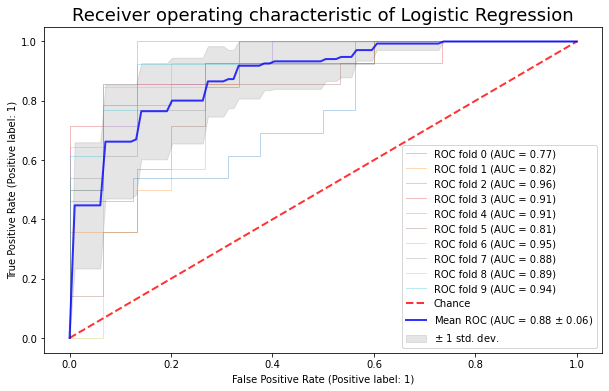

In [294]:
# LogisticRegression
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_LR = LogisticRegression(max_iter=3000)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(10, 6))
for i, (train, test) in enumerate(cv.split(X_cv_nmp, y_cv_nmp)):
    classifier_LR.fit(X_cv_nmp[train], y_cv_nmp[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_LR,
        X_cv_nmp[test],
        y_cv_nmp[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of Logistic Regression",
)
ax.set_title('Receiver operating characteristic of Logistic Regression',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [295]:
len(X_cv_nmp),len(y_cv_nmp)

(287, 287)

In [297]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_LR_cv = LogisticRegression(max_iter=3000)
classifier_LR = LogisticRegression(max_iter=3000)
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_LR_cv = cross_validate(classifier_LR,X_cv_nmp,y_cv_nmp,cv=10,scoring=scoring)

#print(sorted(scores_LR_cv.keys()))
#print(scores_LR_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_LR_cv['test_accuracy'].mean(),scores_LR_cv['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_LR_cv['test_roc_auc'].mean(),scores_LR_cv['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_LR_cv['test_recall'].mean(),scores_LR_cv['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_LR_cv['test_precision'].mean(),scores_LR_cv['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_LR_cv['test_f1'].mean(),scores_LR_cv['test_f1'].std()*2))

10 fold Accuracy: 0.78 (± 0.15)
10 fold AUC: 0.89 (± 0.12)
10 fold Recall: 0.77 (± 0.26)
10 fold Precision: 0.77 (± 0.17)
10 fold f1: 0.76 (± 0.18)


Accuracy (overall correct predictions): 0.83
Auc: 0.9
Recall (all 1s predicted right): 0.72
Precision (confidence when predicting a 1): 0.97
Detail:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        32
           1       0.97      0.72      0.83        40

    accuracy                           0.83        72
   macro avg       0.85      0.85      0.83        72
weighted avg       0.87      0.83      0.83        72



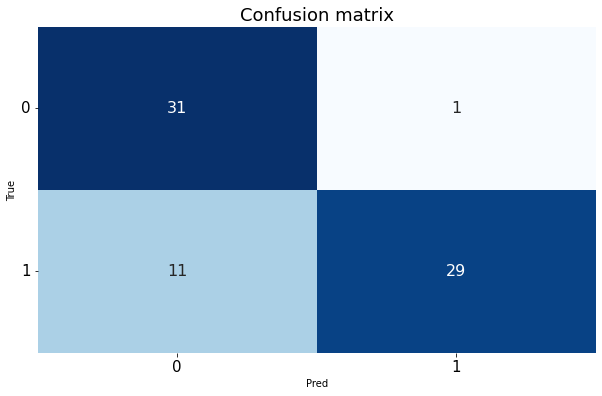

In [299]:
## Trained with 10-fold validation

classifier_LR.fit(X_train, y_train)

## test
predicted_prob_LR = classifier_LR.predict_proba(X_test)[:,1]
predicted = classifier_LR.predict(X_test)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc_test = metrics.roc_auc_score(y_test, predicted_prob_LR)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

##############################################################

classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()
#############################################################

# SVM Classifier

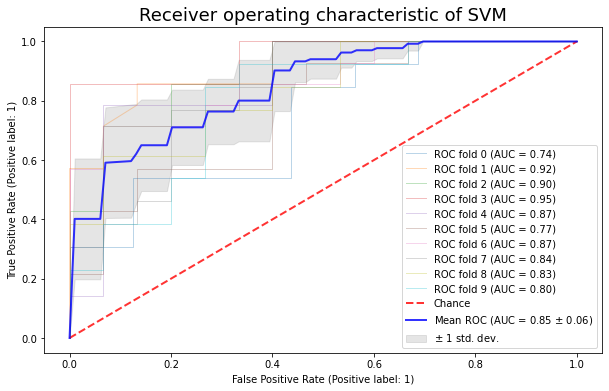

In [300]:
# LogisticRegression
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_SVC = SVC(kernel='rbf',probability=True , class_weight = 'balanced')
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))
for i, (train, test) in enumerate(cv.split(X_cv_nmp, y_cv_nmp)):
    classifier_SVC.fit(X_cv_nmp[train], y_cv_nmp[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_SVC,
        X_cv_nmp[test],
        y_cv_nmp[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of SVM",
)
ax.set_title('Receiver operating characteristic of SVM',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [301]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_SVC_cv = SVC(kernel='rbf',probability=True , class_weight = 'balanced')
classifier_SVC = SVC(kernel='rbf',probability=True , class_weight = 'balanced')
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_SVC_cv = cross_validate(classifier_SVC,X_cv_nmp,y_cv_nmp,cv=10,scoring=scoring)

#print(sorted(scores_SVC_cv.keys()))
#print(scores_SVC_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_SVC_cv['test_accuracy'].mean(),scores_SVC_cv['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_SVC_cv['test_roc_auc'].mean(),scores_SVC_cv['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_SVC_cv['test_recall'].mean(),scores_SVC_cv['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_SVC_cv['test_precision'].mean(),scores_SVC_cv['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_SVC_cv['test_f1'].mean(),scores_SVC_cv['test_f1'].std()*2))

10 fold Accuracy: 0.77 (± 0.16)
10 fold AUC: 0.85 (± 0.13)
10 fold Recall: 0.77 (± 0.20)
10 fold Precision: 0.76 (± 0.22)
10 fold f1: 0.76 (± 0.17)


Accuracy (overall correct predictions): 0.78
Auc: 0.89
Recall (all 1s predicted right): 0.72
Precision (confidence when predicting a 1): 0.85
Detail:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.85      0.72      0.78        40

    accuracy                           0.78        72
   macro avg       0.78      0.78      0.78        72
weighted avg       0.79      0.78      0.78        72



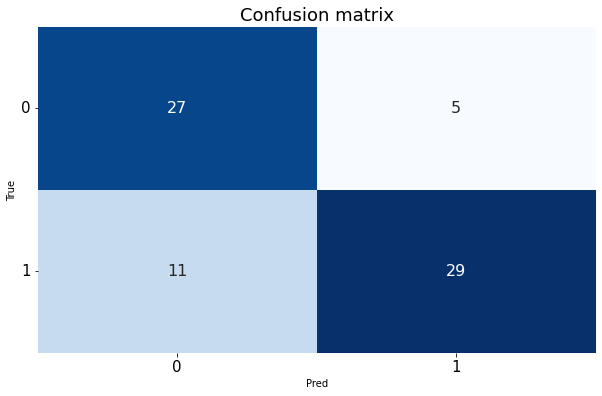

In [302]:
#############################################################

## train
classifier_SVC.fit(X_train, y_train)
## test
predicted_prob_SVC = classifier_SVC.predict_proba(X_test)[:,1]
predicted = classifier_SVC.predict(X_test)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc_test = metrics.roc_auc_score(y_test, predicted_prob_SVC)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

##############################################################

classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

# Decision Tree Classifier

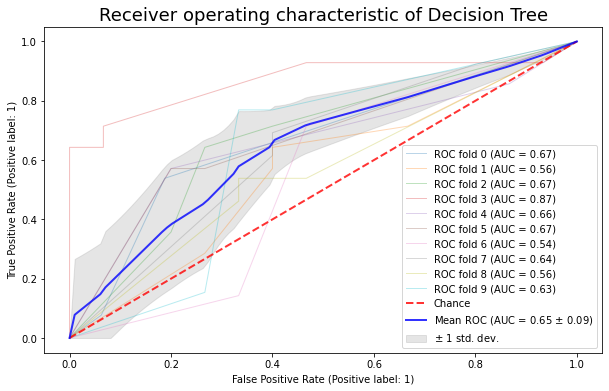

In [303]:
# DecisionTreeClassifier
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_DT = DecisionTreeClassifier(max_depth=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))
for i, (train, test) in enumerate(cv.split(X_cv_nmp, y_cv_nmp)):
    classifier_DT.fit(X_cv_nmp[train], y_cv_nmp[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_DT,
        X_cv_nmp[test],
        y_cv_nmp[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of Decision Tree",
)
ax.set_title('Receiver operating characteristic of Decision Tree',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [304]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_DT_cv = DecisionTreeClassifier(max_depth=6)
classifier_DT = DecisionTreeClassifier(max_depth=6)
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_DT_cv = cross_validate(classifier_DT,X_cv_nmp,y_cv_nmp,cv=10,scoring=scoring)

#print(sorted(scores_DT_cv.keys()))
#print(scores_DT_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_DT_cv['test_accuracy'].mean(),scores_DT_cv['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_DT_cv['test_roc_auc'].mean(),scores_DT_cv['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_DT_cv['test_recall'].mean(),scores_DT_cv['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_DT_cv['test_precision'].mean(),scores_DT_cv['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_DT_cv['test_f1'].mean(),scores_DT_cv['test_f1'].std()*2))

10 fold Accuracy: 0.69 (± 0.15)
10 fold AUC: 0.66 (± 0.20)
10 fold Recall: 0.65 (± 0.23)
10 fold Precision: 0.68 (± 0.19)
10 fold f1: 0.66 (± 0.17)


Accuracy (overall correct predictions): 0.67
Auc: 0.6
Recall (all 1s predicted right): 0.6
Precision (confidence when predicting a 1): 0.75
Detail:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        32
           1       0.75      0.60      0.67        40

    accuracy                           0.67        72
   macro avg       0.68      0.68      0.67        72
weighted avg       0.68      0.67      0.67        72



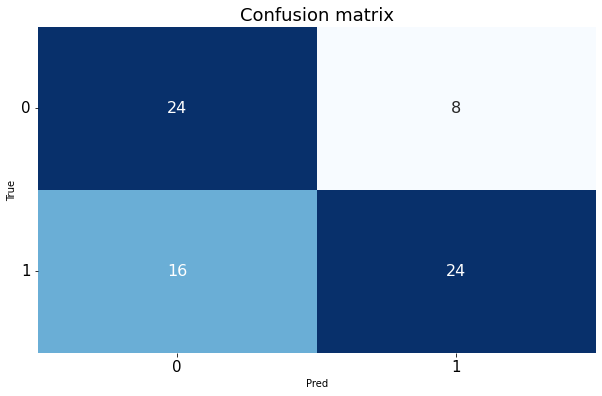

In [305]:
#############################################################

## train
classifier_DT.fit(X_train, y_train)
## test
predicted_prob_DT = classifier_DT.predict_proba(X_test)[:,1]
predicted = classifier_DT.predict(X_test)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc_test = metrics.roc_auc_score(y_test, predicted_prob_DT)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

##############################################################

classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

|--- HTN_drug <= 0.50
|   |--- Smoking <= 0.50
|   |   |--- Kynurenine <= 1.22
|   |   |   |--- DBP <= -1.39
|   |   |   |   |--- Lys <= 1.57
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Lys >  1.57
|   |   |   |   |   |--- class: 0
|   |   |   |--- DBP >  -1.39
|   |   |   |   |--- lysoPCaC182 <= -1.15
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- lysoPCaC182 >  -1.15
|   |   |   |   |   |--- Orn <= 3.82
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Orn >  3.82
|   |   |   |   |   |   |--- class: 1
|   |   |--- Kynurenine >  1.22
|   |   |   |--- class: 1
|   |--- Smoking >  0.50
|   |   |--- Trp <= -0.26
|   |   |   |--- Val <= -1.13
|   |   |   |   |--- SMOHC241 <= 0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- SMOHC241 >  0.03
|   |   |   |   |   |--- class: 1
|   |   |   |--- Val >  -1.13
|   |   |   |   |--- Gln <= 0.76
|   |   |   |   |   |--- waistline <= 2.32
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- waistli

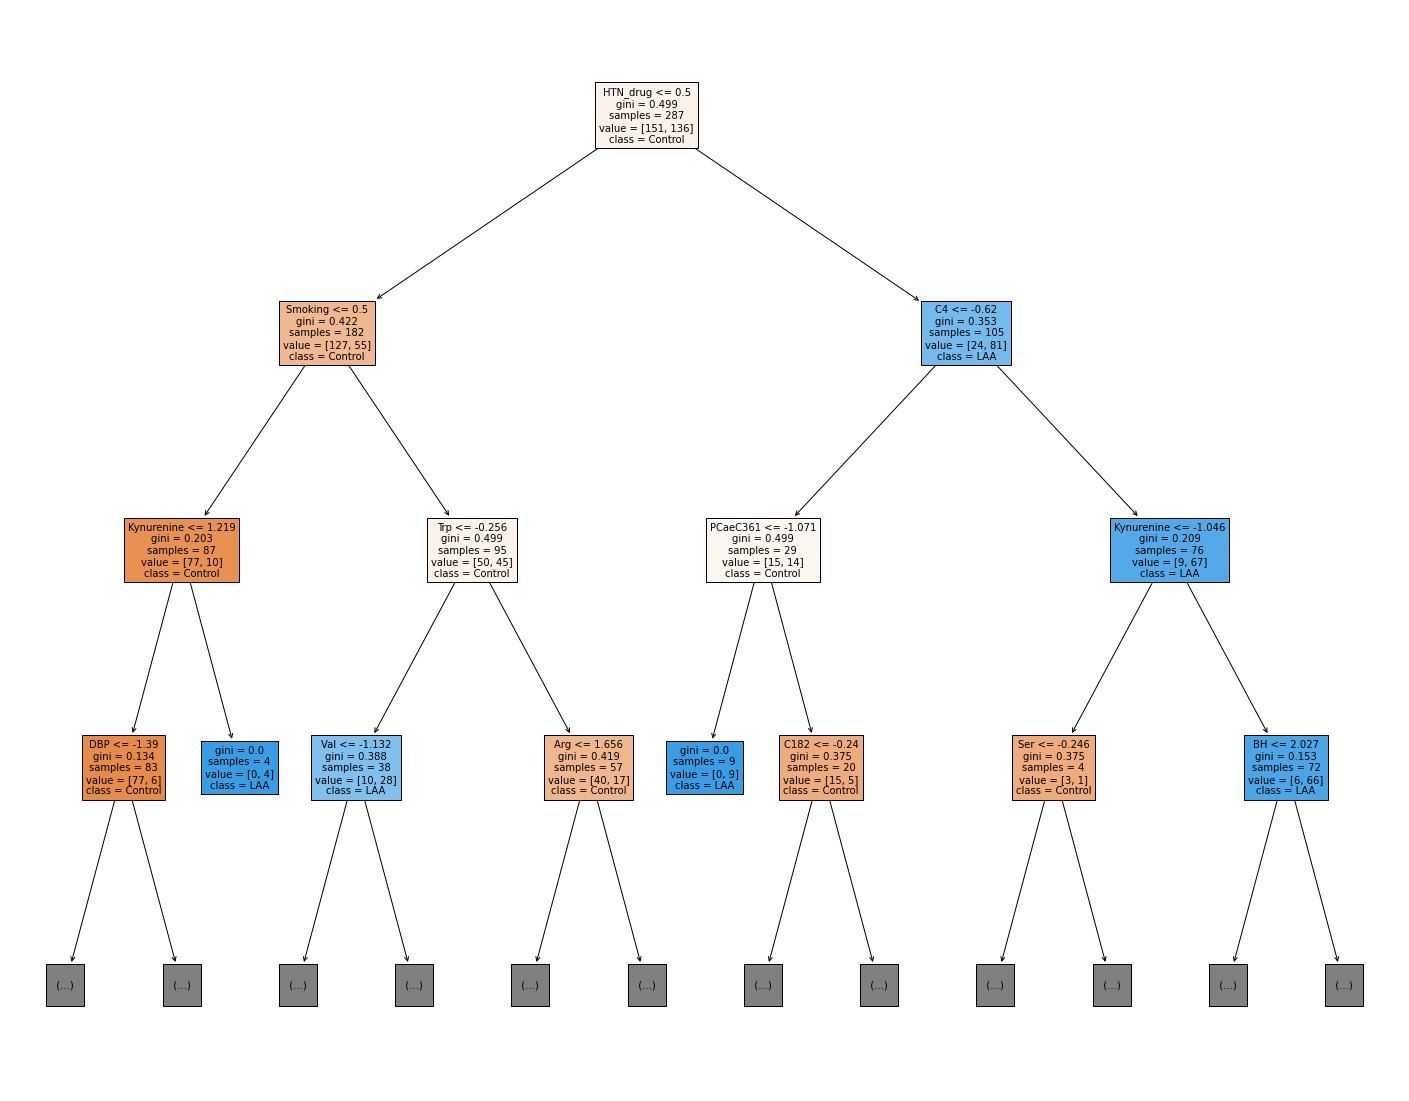

In [306]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

#feature name
feature_names = X_train.columns.values.tolist()

#class name
class_names=['Control','LAA']

text_representation = tree.export_text(classifier_DT,feature_names=feature_names)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier_DT, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True,
                   max_depth=3,
                   fontsize=10)

# Random Forest Classifier

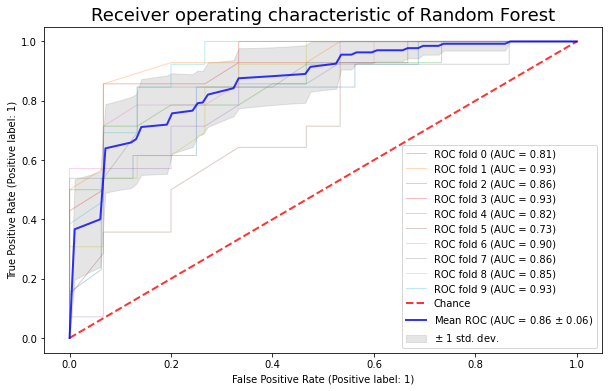

In [307]:
# RandomForestClassifier
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_RF = RandomForestClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))
for i, (train, test) in enumerate(cv.split(X_cv_nmp, y_cv_nmp)):
    classifier_RF.fit(X_cv_nmp[train], y_cv_nmp[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_RF,
        X_cv_nmp[test],
        y_cv_nmp[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of Random Forest",
)
ax.set_title('Receiver operating characteristic of Random Forest',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [308]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
# classifier_RF_cv = RandomForestClassifier()
classifier_RF = RandomForestClassifier()
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_RF_cv = cross_validate(classifier_RF,X_cv_nmp,y_cv_nmp,cv=10,scoring=scoring)

#print(sorted(scores_RF_cv.keys()))
#print(scores_RF_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_RF_cv['test_accuracy'].mean(),scores_RF_cv['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_RF_cv['test_roc_auc'].mean(),scores_RF_cv['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_RF_cv['test_recall'].mean(),scores_RF_cv['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_RF_cv['test_precision'].mean(),scores_RF_cv['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_RF_cv['test_f1'].mean(),scores_RF_cv['test_f1'].std()*2))

10 fold Accuracy: 0.79 (± 0.12)
10 fold AUC: 0.88 (± 0.09)
10 fold Recall: 0.76 (± 0.18)
10 fold Precision: 0.79 (± 0.16)
10 fold f1: 0.77 (± 0.14)


Accuracy (overall correct predictions): 0.79
Auc: 0.88
Recall (all 1s predicted right): 0.68
Precision (confidence when predicting a 1): 0.93
Detail:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        32
           1       0.93      0.68      0.78        40

    accuracy                           0.79        72
   macro avg       0.81      0.81      0.79        72
weighted avg       0.83      0.79      0.79        72



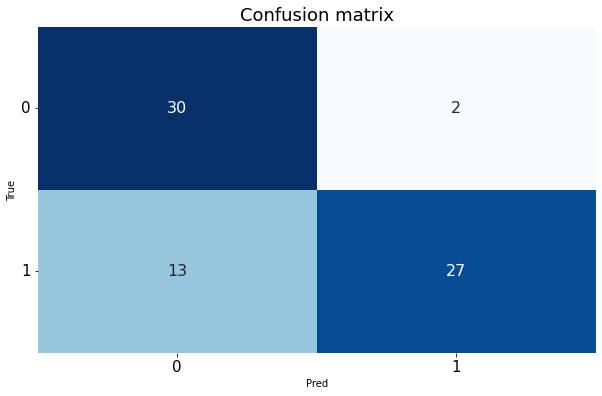

In [309]:
#############################################################

## train
classifier_RF.fit(X_train, y_train)
## test
predicted_prob_RF = classifier_RF.predict_proba(X_test)[:,1]
predicted = classifier_RF.predict(X_test)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc_test = metrics.roc_auc_score(y_test, predicted_prob_RF)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

##############################################################

classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

Elapsed time to compute the importances: 0.012 seconds


<AxesSubplot:title={'center':'Feature Importance'}>

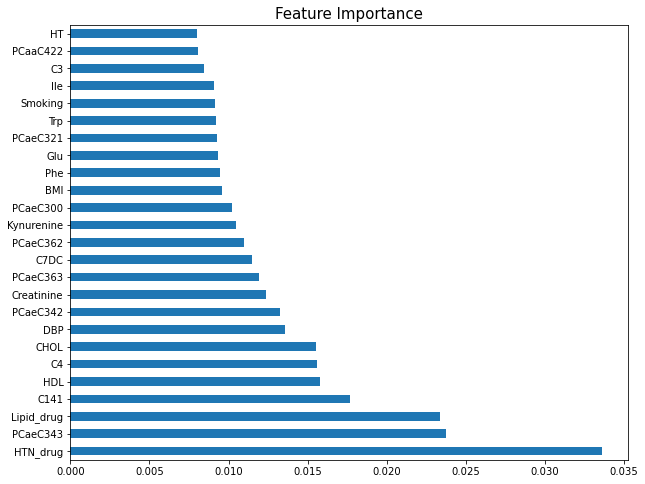

In [310]:
# Show all columns as list
feature_names = X_train.columns.values.tolist()

import time
import numpy as np

plt.figure(figsize=(10, 8))
plt.title(fontsize=15,label="Feature Importance")
start_time = time.time()
importances = classifier_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_RF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)
forest_importances.nlargest(25).plot(kind='barh')
#forest_importances.plot(kind='barh')
# fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
# forest_importances.set_title("Feature importances using MDI")
# forest_importances.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

# XGB Classifier

In [311]:
#list(X_train.columns.values)

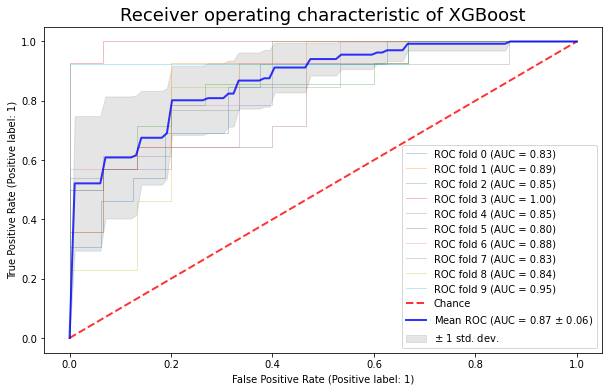

In [312]:
# RandomcolumnsestClassifier
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_XGB = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=None)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))
for i, (train, test) in enumerate(cv.split(X_cv_nmp, y_cv_nmp)):
    classifier_XGB.fit(X_cv_nmp[train], y_cv_nmp[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_XGB,
        X_cv_nmp[test],
        y_cv_nmp[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of XGBoost",
)
ax.set_title('Receiver operating characteristic of XGBoost',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [313]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
# classifier_XGB_cv = XGBClassifier(objective='binary:logistic',
#                           booster='gbtree',
#                           eval_metric='auc',
#                           tree_method='hist',
#                           grow_policy='lossguide',
#                           use_label_encoder=None)

classifier_XGB = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=None)

scoring=['accuracy','roc_auc','recall','precision','f1']

scores_XGB_cv = cross_validate(classifier_XGB,X_cv_nmp,y_cv_nmp,cv=10,scoring=scoring)

#print(sorted(scores_XGB_cv.keys()))
#print(scores_XGB_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_XGB_cv['test_accuracy'].mean(),scores_XGB_cv['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_XGB_cv['test_roc_auc'].mean(),scores_XGB_cv['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_XGB_cv['test_recall'].mean(),scores_XGB_cv['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_XGB_cv['test_precision'].mean(),scores_XGB_cv['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_XGB_cv['test_f1'].mean(),scores_XGB_cv['test_f1'].std()*2))

10 fold Accuracy: 0.80 (± 0.11)
10 fold AUC: 0.87 (± 0.11)
10 fold Recall: 0.75 (± 0.26)
10 fold Precision: 0.81 (± 0.12)
10 fold f1: 0.77 (± 0.15)


Accuracy (overall correct predictions): 0.82
Auc: 0.92
Recall (all 1s predicted right): 0.75
Precision (confidence when predicting a 1): 0.91
Detail:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.91      0.75      0.82        40

    accuracy                           0.82        72
   macro avg       0.83      0.83      0.82        72
weighted avg       0.84      0.82      0.82        72



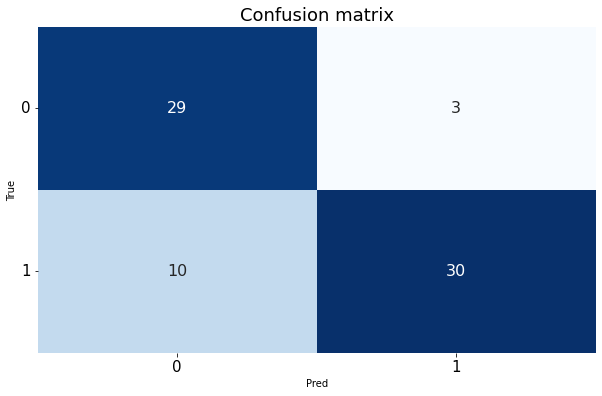

In [314]:
#############################################################

## train
classifier_XGB.fit(X_train, y_train)
## test
predicted_prob_XGB = classifier_XGB.predict_proba(X_test)[:,1]
predicted = classifier_XGB.predict(X_test)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc_test = metrics.roc_auc_score(y_test, predicted_prob_XGB)
print("Accuracy (overall correct predictions):",round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

##############################################################

classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

# Gradient Boost

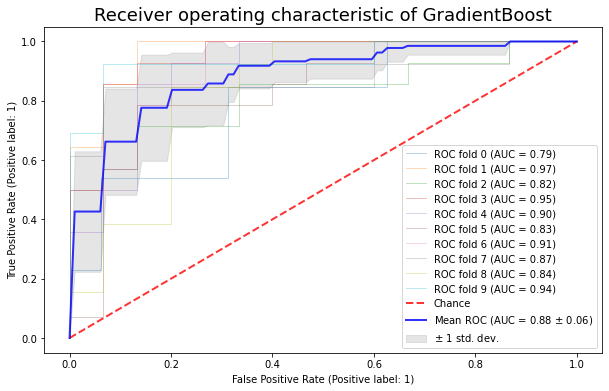

In [315]:
# Gradient Boost
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_GBC = GradientBoostingClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))
for i, (train, test) in enumerate(cv.split(X_cv_nmp, y_cv_nmp)):
    classifier_GBC.fit(X_cv_nmp[train], y_cv_nmp[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_GBC,
        X_cv_nmp[test],
        y_cv_nmp[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of GradientBoost",
)
ax.set_title('Receiver operating characteristic of GradientBoost',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [316]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
# classifier_GBC_cv = GradientBoostingClassifier()
classifier_GBC = GradientBoostingClassifier()
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_GBC_cv = cross_validate(classifier_GBC,X_cv_nmp,y_cv_nmp,cv=10,scoring=scoring)

#print(sorted(scores_GBC_cv.keys()))
#print(scores_GBC_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_GBC_cv['test_accuracy'].mean(),scores_GBC_cv['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_GBC_cv['test_roc_auc'].mean(),scores_GBC_cv['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_GBC_cv['test_recall'].mean(),scores_GBC_cv['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_GBC_cv['test_precision'].mean(),scores_GBC_cv['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_GBC_cv['test_f1'].mean(),scores_GBC_cv['test_f1'].std()*2))

10 fold Accuracy: 0.81 (± 0.13)
10 fold AUC: 0.88 (± 0.12)
10 fold Recall: 0.76 (± 0.25)
10 fold Precision: 0.82 (± 0.13)
10 fold f1: 0.78 (± 0.17)


Accuracy (overall correct predictions): 0.86
Auc: 0.93
Recall (all 1s predicted right): 0.78
Precision (confidence when predicting a 1): 0.97
Detail:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.97      0.78      0.86        40

    accuracy                           0.86        72
   macro avg       0.87      0.87      0.86        72
weighted avg       0.88      0.86      0.86        72



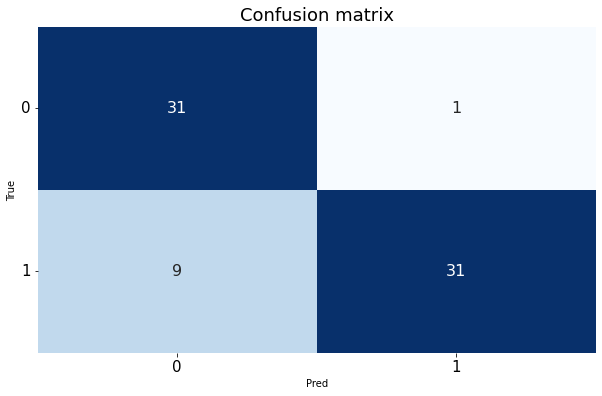

In [317]:
#############################################################

## train
classifier_GBC.fit(X_train, y_train)

## test
predicted_prob_GBC = classifier_GBC.predict_proba(X_test)[:,1]
predicted = classifier_GBC.predict(X_test)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc_test = metrics.roc_auc_score(y_test, predicted_prob_GBC)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

##############################################################

classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

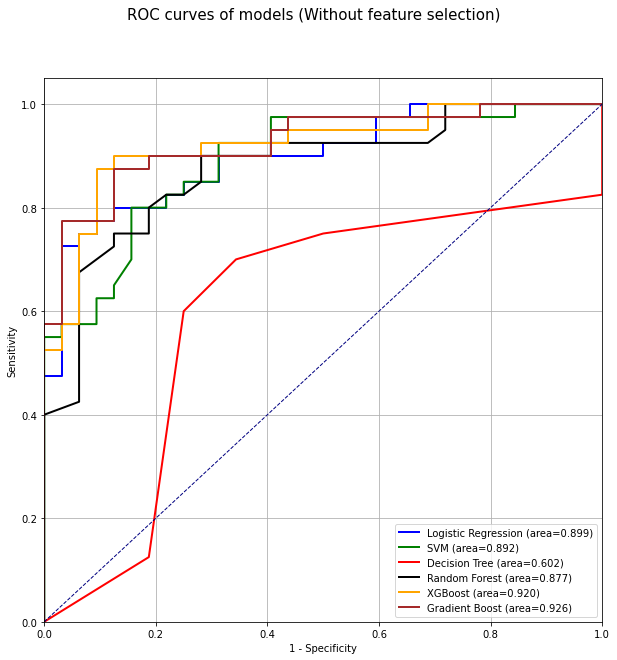

In [318]:
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(10, 10))
#plt.rcParams.update({'font.size': 14})
plt.grid()

fpr, tpr, roc_auc = roc_curve_and_score(y_test, predicted_prob_LR)
plt.plot(fpr, tpr, color='blue', lw=2,
         label='Logistic Regression (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, predicted_prob_SVC)
plt.plot(fpr, tpr, color='green', lw=2,
         label='SVM (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, predicted_prob_DT)
plt.plot(fpr, tpr, color='red', lw=2,
         label='Decision Tree (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, predicted_prob_RF)
plt.plot(fpr, tpr, color='black', lw=2,
         label='Random Forest (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, predicted_prob_XGB)
plt.plot(fpr, tpr, color='orange', lw=2,
         label='XGBoost (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, predicted_prob_GBC)
plt.plot(fpr, tpr, color='brown', lw=2,
         label='Gradient Boost (area={0:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.suptitle('ROC curves of models (Without feature selection)',fontsize=15)
plt.show()

# RFE (Recursive Feature Elimination) 

In [58]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [59]:
X_train_rfe=X_train
X_test_rfe=X_test
y_train_rfe=y_train
y_test_rfe=y_test

In [60]:
cv_rfe = StratifiedKFold(n_splits=10)

## RFE (Logistic Regression)

In [61]:
selector_LR = RFECV(LogisticRegression(max_iter=3000), cv=cv_rfe,scoring="roc_auc")
selector_LR = selector_LR.fit(X_train_rfe, y_train_rfe)
g_scores_LR = selector_LR.grid_scores_
avg_LR = np.average(g_scores_LR, axis=1)

rfe_kept_LR = pd.DataFrame({'columns': X_train_rfe.columns,'Kept': selector_LR.support_})
rfe_kept_LR_select=rfe_kept_LR[rfe_kept_LR["Kept"]== True]
kept_LR=rfe_kept_LR_select['columns'].array

len(rfe_kept_LR_select)
print("Optimal AUC of features is : %f" % avg_LR.max() )
print("Optimal number of features in LR is: %d" % selector_LR.n_features_)

Optimal AUC of features is : 0.901003
Optimal number of features in LR is: 62


In [62]:
g_scores_LR

array([[0.71394231, 0.53571429, 0.68333333, ..., 0.63589744, 0.62051282,
        0.71282051],
       [0.80528846, 0.75952381, 0.68571429, ..., 0.65384615, 0.67948718,
        0.77179487],
       [0.83653846, 0.82380952, 0.73809524, ..., 0.72051282, 0.76153846,
        0.80769231],
       ...,
       [0.76923077, 0.82380952, 0.95714286, ..., 0.88205128, 0.89230769,
        0.94358974],
       [0.76923077, 0.82380952, 0.95714286, ..., 0.88205128, 0.89230769,
        0.94358974],
       [0.76923077, 0.82380952, 0.95714286, ..., 0.88205128, 0.89230769,
        0.94358974]])

In [63]:
kept_LR

<PandasArray>
[        'age',          'HT',          'DM',     'Smoking',     'Alcohol',
          'BW',         'BMI',         'DBP',         'HDL',         'LDL',
        'CHOL',  'Creatinine',  'Lipid_drug',     'DM_drug',    'HTN_drug',
          'C0',         'C10',       'C12DC',        'C141',      'C142OH',
        'C182',          'C2',          'C3',          'C4',         'C41',
     'C6C41DC',          'C5',          'C8',         'Ala',         'Asn',
         'Cit',         'Lys',         'Phe',         'Pro',         'Ser',
         'Thr',         'Trp',  'Kynurenine',   'Sarcosine', 'lysoPCaC260',
 'lysoPCaC281',    'PCaaC300',    'PCaaC360',    'PCaaC364',    'PCaaC365',
    'PCaaC404',    'PCaaC406',    'PCaaC422',    'PCaaC424',    'PCaeC302',
    'PCaeC342',    'PCaeC360',    'PCaeC362',    'PCaeC383',    'PCaeC405',
    'PCaeC424',    'SMOHC161',    'SMOHC221',    'SMOHC222',      'SMC180',
      'SMC181',      'SMC241']
Length: 62, dtype: object

In [64]:
g_scores_LR_df=pd.DataFrame(g_scores_LR)
g_scores_LR_df.to_csv("./new-data-220328/gridscores/g_scores_LR.txt",index=False, sep="\t")

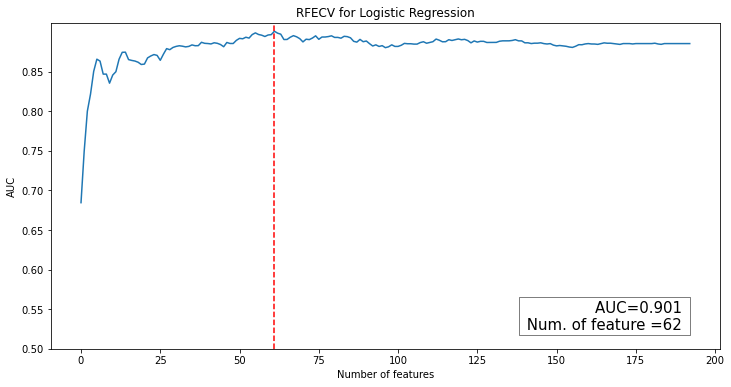

In [65]:
import numpy as np
import matplotlib.pyplot as plt



# data to be plotted
x = np.arange(0, len(avg_LR))
y = avg_LR

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)
ax.title.set_text('RFECV for Logistic Regression')
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "AUC={:.3f} \n Num. of feature ={:.0f} ".format(ymax,xmax+1)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    #arrowprops=dict(facecolor='black', shrink=0.01)
    kw = dict(xycoords='data',textcoords="axes fraction",
               bbox=bbox_props, ha="right", va="center")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.95, 0.1), **kw,fontsize=15)
    ax.axvline(x=xmax, color='r', label='test lines',linestyle='--')
annot_max(x,y)
plt.yticks(np.arange(0.5, 0.9, step=0.05))
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

## RFE (SVM)

In [66]:
selector_SVC = RFECV(SVC(kernel='linear'), cv=cv_rfe,scoring="roc_auc")
selector_SVC = selector_SVC.fit(X_train_rfe, y_train_rfe)
g_scores_SVC = selector_SVC.grid_scores_
avg_SVC = np.average(g_scores_SVC, axis=1)

rfe_kept_SVC = pd.DataFrame({'columns': X_train_rfe.columns,'Kept': selector_SVC.support_})
rfe_kept_SVC_select=rfe_kept_SVC[rfe_kept_SVC["Kept"]== True]
kept_SVC=rfe_kept_SVC_select['columns'].array

len(rfe_kept_SVC_select)
print("Optimal AUC of features is : %f" % avg_SVC.max() )
print("Optimal number of features in SVC is: %d" % selector_SVC.n_features_)

Optimal AUC of features is : 0.883022
Optimal number of features in SVC is: 83


In [67]:
kept_SVC

<PandasArray>
[        'age',          'HT',          'DM',     'Smoking',     'Alcohol',
          'BW',         'BMI',         'DBP',         'HDL',         'LDL',
          'TG',        'CHOL',  'Creatinine',  'Lipid_drug',     'DM_drug',
    'HTN_drug',          'C0',         'C10',        'C102',       'C12DC',
         'C14',        'C141',        'C142',      'C142OH',      'C161OH',
      'C181OH',        'C182',          'C2',          'C3',          'C4',
         'C41',     'C6C41DC',          'C5',        'C7DC',          'C8',
          'C9',         'Ala',         'Asn',         'Lys',         'Orn',
         'Phe',         'Pro',         'Ser',         'Thr',         'Trp',
  'Kynurenine',   'Sarcosine', 'lysoPCaC170', 'lysoPCaC204', 'lysoPCaC240',
 'lysoPCaC281',    'PCaaC300',    'PCaaC343',    'PCaaC344',    'PCaaC360',
    'PCaaC361',    'PCaaC362',    'PCaaC363',    'PCaaC364',    'PCaaC365',
    'PCaaC403',    'PCaaC404',    'PCaaC406',    'PCaaC422',    'PCaaC424'

In [68]:
g_scores_SVC_df=pd.DataFrame(g_scores_SVC)
g_scores_SVC_df.to_csv("./new-data-220328/gridscores/g_scores_SVC.txt",index=False, sep="\t")

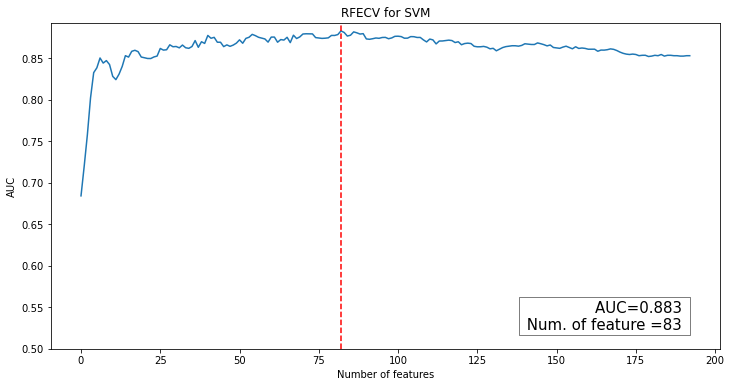

In [69]:
import numpy as np
import matplotlib.pyplot as plt



# data to be plotted
x = np.arange(0, len(avg_SVC))
y = avg_SVC

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)
ax.title.set_text('RFECV for SVM')
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "AUC={:.3f} \n Num. of feature ={:.0f} ".format(ymax,xmax+1)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    #arrowprops=dict(facecolor='black', shrink=0.01)
    kw = dict(xycoords='data',textcoords="axes fraction",
               bbox=bbox_props, ha="right", va="center")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.95, 0.1), **kw,fontsize=15)
    ax.axvline(x=xmax, color='r', label='test lines',linestyle='--')
annot_max(x,y)
plt.yticks(np.arange(0.5, 0.9, step=0.05))
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

## RFE (Decision Tree)

In [70]:
selector_DT = RFECV(DecisionTreeClassifier(criterion='gini'), cv=cv_rfe,scoring="roc_auc")
selector_DT = selector_DT.fit(X_train_rfe, y_train_rfe)
g_scores_DT = selector_DT.grid_scores_
avg_DT = np.average(g_scores_DT, axis=1)

rfe_kept_DT = pd.DataFrame({'columns': X_train_rfe.columns,'Kept': selector_DT.support_})
rfe_kept_DT_select=rfe_kept_DT[rfe_kept_DT["Kept"]== True]
kept_DT=rfe_kept_DT_select['columns'].array

len(rfe_kept_DT_select)
print("Optimal AUC of features is : %f" % avg_DT.max() )
print("Optimal number of features in DT is: %d" % selector_DT.n_features_)

Optimal AUC of features is : 0.726200
Optimal number of features in DT is: 183


In [71]:
kept_DT

<PandasArray>
[   'Smoking',    'Alcohol', 'FHx stroke',        'CKD',         'BH',
         'BW',        'BMI',  'waistline',        'Hip',        'SBP',
 ...
   'SMOHC222',   'SMOHC241',     'SMC160',     'SMC161',     'SMC180',
     'SMC181',     'SMC202',     'SMC240',     'SMC241',     'SMC260']
Length: 183, dtype: object

In [72]:
g_scores_DT_df=pd.DataFrame(g_scores_DT)
g_scores_DT_df.to_csv("./new-data-220328/gridscores/g_scores_DT.txt",index=False, sep="\t")

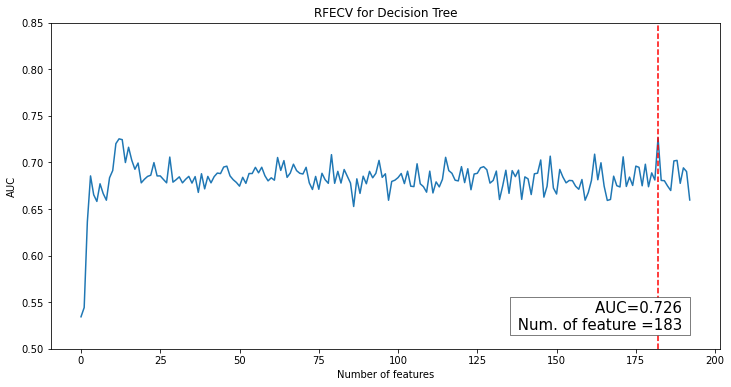

In [73]:
import numpy as np
import matplotlib.pyplot as plt



# data to be plotted
x = np.arange(0, len(avg_DT))
y = avg_DT

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)
ax.title.set_text('RFECV for Decision Tree')
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "AUC={:.3f} \n Num. of feature ={:.0f} ".format(ymax,xmax+1)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    #arrowprops=dict(facecolor='black', shrink=0.01)
    kw = dict(xycoords='data',textcoords="axes fraction",
               bbox=bbox_props, ha="right", va="center")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.95, 0.1), **kw,fontsize=15)
    ax.axvline(x=xmax, color='r', label='test lines',linestyle='--')
annot_max(x,y)
plt.yticks(np.arange(0.5, 0.9, step=0.05))
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

## RFE (Random Forest)

In [74]:
selector_RF = RFECV(RandomForestClassifier(), cv=cv_rfe,scoring="roc_auc")
selector_RF = selector_RF.fit(X_train_rfe, y_train_rfe)
g_scores_RF = selector_RF.grid_scores_
avg_RF = np.average(g_scores_RF, axis=1)

rfe_kept_RF = pd.DataFrame({'columns': X_train_rfe.columns,'Kept': selector_RF.support_})
rfe_kept_RF_select=rfe_kept_RF[rfe_kept_RF["Kept"]== True]
kept_RF=rfe_kept_RF_select['columns'].array

len(rfe_kept_RF_select)
print("Optimal AUC of features is : %f" % avg_RF.max() )
print("Optimal number of features in RF is: %d" % selector_RF.n_features_)

Optimal AUC of features is : 0.891653
Optimal number of features in RF is: 183


In [75]:
kept_RF

<PandasArray>
[      'age',        'HT',        'DM',   'Smoking',        'BH',        'BW',
       'BMI', 'waistline',       'Hip',       'SBP',
 ...
  'SMOHC241',    'SMC160',    'SMC161',    'SMC180',    'SMC181',    'SMC202',
    'SMC240',    'SMC241',    'SMC260',    'SMC261']
Length: 183, dtype: object

In [76]:
g_scores_RF_df=pd.DataFrame(g_scores_RF)
g_scores_RF_df.to_csv("./new-data-220328/gridscores/g_scores_RF.txt",index=False, sep="\t")

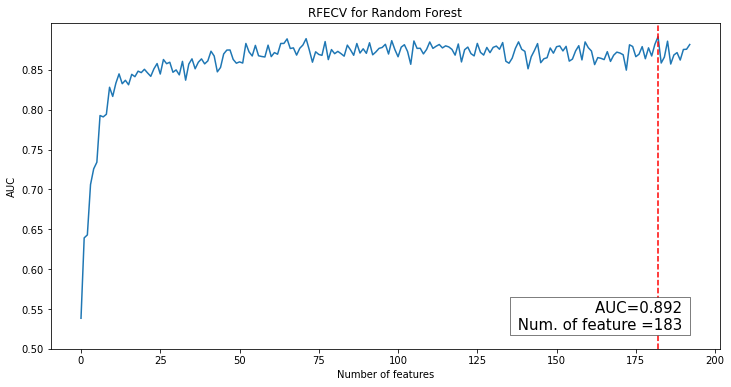

In [77]:
import numpy as np
import matplotlib.pyplot as plt



# data to be plotted
x = np.arange(0, len(avg_RF))
y = avg_RF

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)
ax.title.set_text('RFECV for Random Forest')
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "AUC={:.3f} \n Num. of feature ={:.0f} ".format(ymax,xmax+1)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    #arrowprops=dict(facecolor='black', shrink=0.01)
    kw = dict(xycoords='data',textcoords="axes fraction",
               bbox=bbox_props, ha="right", va="center")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.95, 0.1), **kw,fontsize=15)
    ax.axvline(x=xmax, color='r', label='test lines',linestyle='--')
annot_max(x,y)
plt.yticks(np.arange(0.5, 0.9, step=0.05))
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

## RFE (XGB)

In [78]:
selector_XGB = RFECV(XGBClassifier(eval_metric='auc'), cv=cv_rfe,scoring="roc_auc")
selector_XGB = selector_XGB.fit(X_train_rfe, y_train_rfe)
g_scores_XGB = selector_XGB.grid_scores_
avg_XGB = np.average(g_scores_XGB, axis=1)


rfe_kept_XGB = pd.DataFrame({'columns': X_train_rfe.columns,'Kept': selector_XGB.support_})
rfe_kept_XGB_select=rfe_kept_XGB[rfe_kept_XGB["Kept"]== True]
kept_XGB=rfe_kept_XGB_select['columns'].array

len(rfe_kept_XGB_select)
print("Optimal AUC of features is : %f" % avg_XGB.max() )
print("Optimal number of features in XGB is: %d" % selector_XGB.n_features_)

Optimal AUC of features is : 0.871323
Optimal number of features in XGB is: 115


In [79]:
kept_XGB

<PandasArray>
[     'age',       'HT',       'DM',  'Smoking',  'Alcohol',       'BW',
      'BMI',      'Hip',      'SBP',      'DBP',
 ...
 'SMOHC141', 'SMOHC161', 'SMOHC241',   'SMC180',   'SMC181',   'SMC202',
   'SMC240',   'SMC241',   'SMC260',   'SMC261']
Length: 115, dtype: object

In [80]:
g_scores_XGB_df=pd.DataFrame(g_scores_XGB)
g_scores_XGB_df.to_csv("./new-data-220328/gridscores/g_scores_XGB.txt",index=False, sep="\t")

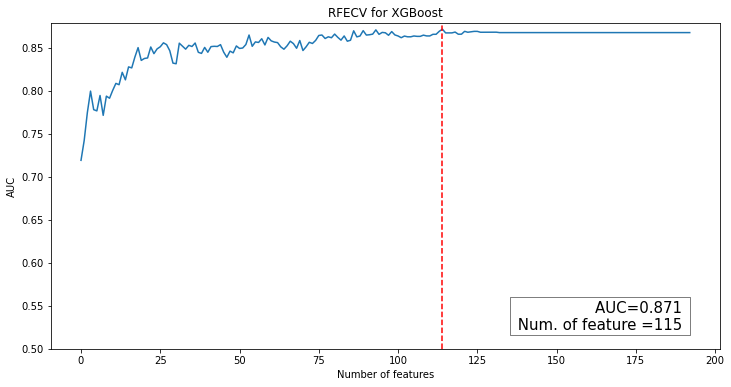

In [81]:
import numpy as np
import matplotlib.pyplot as plt



# data to be plotted
x = np.arange(0, len(avg_XGB))
y = avg_XGB

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)
ax.title.set_text('RFECV for XGBoost')
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "AUC={:.3f} \n Num. of feature ={:.0f} ".format(ymax,xmax+1)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    #arrowprops=dict(facecolor='black', shrink=0.01)
    kw = dict(xycoords='data',textcoords="axes fraction",
               bbox=bbox_props, ha="right", va="center")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.95, 0.1), **kw,fontsize=15)
    ax.axvline(x=xmax, color='r', label='test lines',linestyle='--')
annot_max(x,y)
plt.yticks(np.arange(0.5, 0.9, step=0.05))
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

## RFE (GradientBoosting)

In [82]:
selector_GBC = RFECV(GradientBoostingClassifier(), cv=cv_rfe,scoring="roc_auc")
selector_GBC = selector_GBC.fit(X_train_rfe, y_train_rfe)
g_scores_GBC = selector_GBC.grid_scores_
avg_GBC = np.average(g_scores_GBC, axis=1)

rfe_kept_GBC = pd.DataFrame({'columns': X_train_rfe.columns,'Kept': selector_GBC.support_})
rfe_kept_GBC_select=rfe_kept_GBC[rfe_kept_GBC["Kept"]== True]
kept_GBC=rfe_kept_GBC_select['columns'].array

len(rfe_kept_GBC_select)
print("Optimal AUC of features is : %f" % avg_GBC.max() )
print("Optimal number of features in GBC is: %d" % selector_GBC.n_features_)

Optimal AUC of features is : 0.889249
Optimal number of features in GBC is: 156


In [83]:
kept_GBC

<PandasArray>
[       'age',        'sex',         'HT',         'DM',    'Smoking',
    'Alcohol', 'FHx stroke',        'CKD',         'BH',         'BW',
 ...
   'SMOHC241',     'SMC160',     'SMC161',     'SMC180',     'SMC181',
     'SMC202',     'SMC240',     'SMC241',     'SMC260',     'SMC261']
Length: 156, dtype: object

In [84]:
g_scores_GBC_df=pd.DataFrame(g_scores_GBC)
g_scores_GBC_df.to_csv("./new-data-220328/gridscores/g_scores_GBC.txt",index=False, sep="\t")

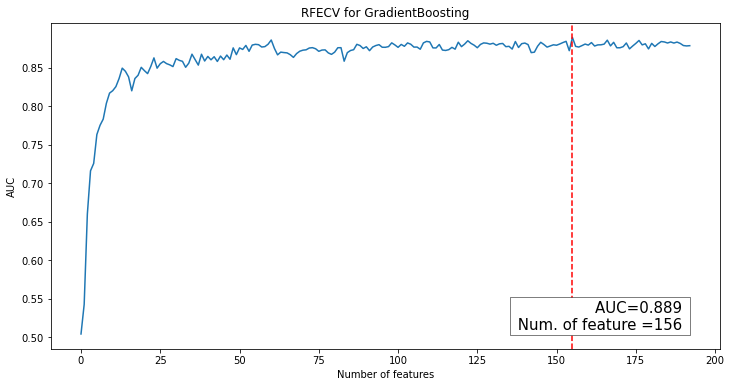

In [85]:
import numpy as np
import matplotlib.pyplot as plt



# data to be plotted
x = np.arange(0, len(avg_GBC))
y = avg_GBC

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)
ax.title.set_text('RFECV for GradientBoosting')
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "AUC={:.3f} \n Num. of feature ={:.0f} ".format(ymax,xmax+1)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    #arrowprops=dict(facecolor='black', shrink=0.01)
    kw = dict(xycoords='data',textcoords="axes fraction",
               bbox=bbox_props, ha="right", va="center")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.95, 0.1), **kw,fontsize=15)
    ax.axvline(x=xmax, color='r', label='test lines',linestyle='--')
annot_max(x,y)
plt.yticks(np.arange(0.5, 0.9, step=0.05))
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

<AxesSubplot:>

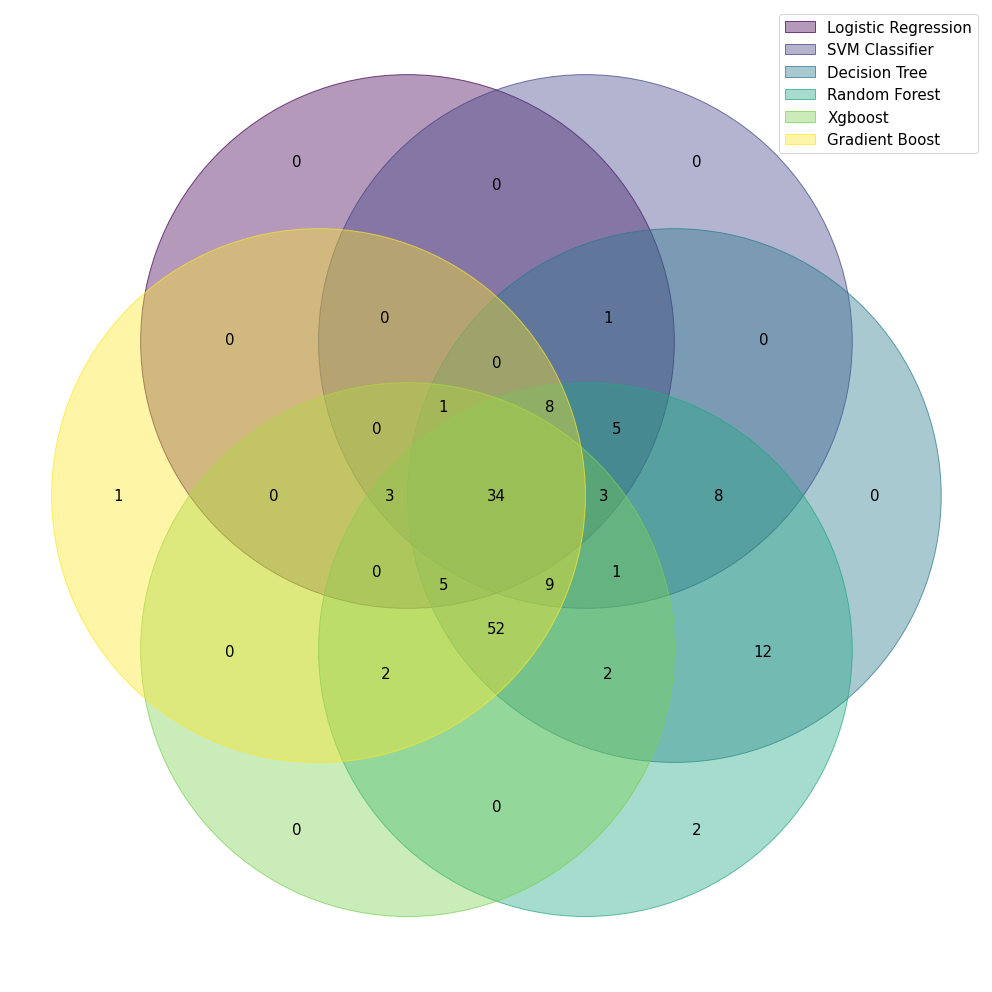

In [104]:
from venn import venn
from venn import pseudovenn

%matplotlib inline

set_LR = set(kept_LR)
set_SVC = set(kept_SVC)
set_DT = set(kept_DT)
set_RF = set(kept_RF)
set_XGB = set(kept_XGB)
set_GBC = set(kept_GBC)


feature_plot={
    'Logistic Regression':set_LR,
    'SVM Classifier':set_SVC,
    'Decision Tree':set_DT,
    'Random Forest':set_RF,
    'Xgboost':set_XGB,
    'Gradient Boost':set_GBC
}

pseudovenn(feature_plot,fontsize=15,figsize=(18,18),hint_hidden=False)

In [105]:
feature_6_models=list(set(set_LR) & set(set_SVC) & set(set_DT) & set(set_RF) & set(set_XGB) & set(set_GBC))

In [106]:
len(feature_6_models)

34

In [107]:
feature_6_models

['BW',
 'Pro',
 'HDL',
 'Asn',
 'PCaaC364',
 'HTN_drug',
 'C2',
 'C4',
 'Ser',
 'SMC180',
 'Lipid_drug',
 'LDL',
 'C141',
 'Creatinine',
 'Trp',
 'C0',
 'Sarcosine',
 'PCaaC406',
 'PCaeC360',
 'C3',
 'SMOHC161',
 'C10',
 'PCaaC300',
 'Ala',
 'PCaaC360',
 'PCaaC404',
 'DBP',
 'Smoking',
 'C182',
 'C8',
 'Phe',
 'BMI',
 'Kynurenine',
 'CHOL']

# Save the model feature parameter (Features on Paper)

In [142]:
set_LR_save={'Ala','Alcohol','Asn','BMI','BW', 'C0', 'C10', 'C12DC', 'C141', 'C142OH', 'C182', 'C2', 'C3', 'C4', 'C41', 'C5','C6C41DC', 'C8', 'CHOL', 'Cit', 'Creatinine', 'DBP', 'DM', 'DM_drug', 'HDL', 'HT', 'HTN_drug', 'Kynurenine', 'LDL', 'Lipid_drug', 'Lys', 'PCaaC300', 'PCaaC360', 'PCaaC364', 'PCaaC365', 'PCaaC404', 'PCaaC406', 'PCaaC422', 'PCaaC424', 'PCaeC302','PCaeC342','PCaeC360', 'PCaeC362','PCaeC383','PCaeC405','PCaeC424','Phe','Pro','SMC180','SMC181','SMC241','SMOHC161','SMOHC221','SMOHC222','Sarcosine','Ser','Smoking','Thr','Trp','age','lysoPCaC260','lysoPCaC281'}
len(set_LR_save)

62

In [143]:
set_SVC_save={'Ala', 'Alcohol', 'Asn', 'BMI', 'BW', 'C0', 'C10', 'C102', 'C12DC', 'C14', 'C141', 'C142', 'C142OH', 'C161OH', 'C181OH', 'C182', 'C2', 'C3', 'C4', 'C41', 'C5', 'C6C41DC', 'C7DC', 'C8', 'C9', 'CHOL', 'Creatinine', 'DBP', 'DM', 'DM_drug', 'HDL', 'HT', 'HTN_drug', 'Kynurenine', 'LDL', 'Lipid_drug', 'Lys', 'Orn', 'PCaaC300', 'PCaaC343', 'PCaaC344', 'PCaaC360', 'PCaaC361', 'PCaaC362', 'PCaaC363', 'PCaaC364', 'PCaaC365', 'PCaaC403', 'PCaaC404', 'PCaaC406', 'PCaaC422', 'PCaaC424', 'PCaeC302', 'PCaeC322', 'PCaeC341','PCaeC360', 'PCaeC364', 'PCaeC380', 'PCaeC382', 'PCaeC383', 'PCaeC401', 'PCaeC405', 'PCaeC424', 'PCaeC444', 'Phe', 'Pro', 'SMC161','SMC180', 'SMC261', 'SMOHC161', 'SMOHC221','SMOHC222', 'Sarcosine', 'Ser', 'Smoking', 'TG', 'Thr', 'Trp', 'age', 'lysoPCaC170', 'lysoPCaC204', 'lysoPCaC240', 'lysoPCaC281'}
len(set_SVC_save)

83

In [144]:
set_DT_save={'Arg', 'BMI', 'C182', 'C2', 'C4', 'C9', 'HTN_drug', 'HsCRP', 'Kynurenine', 'PCaeC361', 'Smoking', 'Trp', 'Val'}
len(set_DT_save)

13

In [145]:
set_RF_save={'AcSugar', 'Asp', 'BMI', 'BW', 'C0', 'C10','C101', 'C12', 'C121', 'C141', 'C161', 'C182', 'C3', 'C4', 'C5', 'C7DC', 'C8', 'C9', 'CHOL', 'Cit', 'Creatinine', 'Creatinine_MS', 'DBP', 'DM', 'DM_drug', 'Glu', 'HDL', 'HTN_drug', 'Hip', 'Homocysteine', 'HsCRP', 'Ile', 'Kynurenine', 'LDL', 'Leu', 'Lipid_drug', 'Lys', 'MBP', 'Met', 'PCaaC240', 'PCaaC281', 'PCaaC323', 'PCaaC343', 'PCaaC344', 'PCaaC361', 'PCaaC364', 'PCaaC366', 'PCaaC383','PCaaC384', 'PCaaC402', 'PCaaC406', 'PCaaC421', 'PCaaC422', 'PCaaC425', 'PCaaC426', 'PCaeC300', 'PCaeC302', 'PCaeC321', 'PCaeC322', 'PCaeC340', 'PCaeC342', 'PCaeC343', 'PCaeC362', 'PCaeC363', 'PCaeC380', 'PCaeC386', 'PCaeC420', 'PCaeC445', 'PCaeC446', 'Phe', 'Pro', 'SBP', 'SDMA', 'SMC161', 'SMC181', 'SMC202', 'SMC241', 'SMC260', 'SMC261', 'SMOHC141', 'SMOHC161', 'SMOHC241', 'Sarcosine', 'Ser', 'TG', 'Trp', 'Tyr', 'UA', 'Val', 'age', 'lysoPCaC161', 'lysoPCaC182', 'lysoPCaC203', 'lysoPCaC204', 'lysoPCaC260'}
len(set_RF_save)

95

In [146]:
set_XGB_save={'AcSugar', 'Ala', 'Alcohol', 'Arg', 'Asn', 'Asp', 'BMI', 'BW', 'C0', 'C10', 'C101', 'C102', 'C12', 'C121', 'C141', 'C16', 'C161', 'C16OH', 'C18', 'C181', 'C182', 'C2', 'C3', 'C4', 'C51', 'C51DC', 'C6C41DC', 'C7DC', 'C8', 'CHOL', 'Cit', 'Creatinine', 'Creatinine_MS', 'DBP', 'DM', 'Gln', 'Glu', 'Gly', 'HDL', 'HT', 'HTN_drug', 'HeartRate', 'Hip', 'His', 'Homocysteine', 'HsCRP', 'Ile', 'Kynurenine', 'LDL', 'Lipid_drug', 'MBP', 'Met', 'Orn', 'PCaaC281', 'PCaaC300', 'PCaaC323', 'PCaaC341', 'PCaaC342', 'PCaaC360', 'PCaaC364', 'PCaaC365', 'PCaaC366', 'PCaaC383', 'PCaaC384', 'PCaaC385', 'PCaaC403', 'PCaaC404', 'PCaaC406', 'PCaaC422', 'PCaeC300', 'PCaeC322', 'PCaeC340', 'PCaeC342', 'PCaeC343', 'PCaeC360', 'PCaeC361', 'PCaeC363', 'PCaeC380', 'PCaeC382', 'PCaeC385', 'PCaeC386', 'PCaeC420', 'PCaeC421', 'PCaeC423', 'PCaeC446', 'Phe', 'Pro', 'SBP', 'SDMA', 'SMC180', 'SMC181', 'SMC202', 'SMC240', 'SMC241', 'SMC260', 'SMC261', 'SMOHC141', 'SMOHC161', 'SMOHC241', 'Sarcosine', 'Ser', 'Smoking', 'TG', 'Trp', 'UA', 'Val', 'age', 'lysoPCaC161', 'lysoPCaC203', 'lysoPCaC204', 'lysoPCaC240', 'lysoPCaC260', 'lysoPCaC261', 'lysoPCaC281','t4OHPro'}
len(set_XGB_save)

115

In [147]:
set_GBC_save={'ADMA', 'AcSugar', 'Ala', 'Arg', 'Asn', 'Asp', 'BH', 'BMI', 'BW', 'C0', 'C10', 'C101', 'C102', 'C12', 'C121', 'C12DC', 'C141', 'C161', 'C161OH', 'C162OH', 'C18', 'C182', 'C2', 'C3', 'C3DCC4OH', 'C3OH', 'C4', 'C5', 'C51', 'C51DC', 'C5DCC6OH', 'C61', 'C7DC', 'C8', 'CHOL', 'Cit', 'Creatinine', 'Creatinine_MS', 'DBP', 'DM', 'DM_drug', 'Gln', 'Glu', 'Gly', 'HDL', 'HT', 'HTN_drug', 'Hip', 'HsCRP', 'Ile', 'Kynurenine', 'LDL', 'Leu', 'Lipid_drug', 'Lys', 'Met', 'Orn', 'PCaaC240', 'PCaaC300', 'PCaaC323', 'PCaaC341', 'PCaaC342', 'PCaaC361', 'PCaaC363', 'PCaaC364', 'PCaaC366', 'PCaaC380', 'PCaaC383', 'PCaaC384', 'PCaaC385', 'PCaaC402', 'PCaaC404', 'PCaaC406', 'PCaeC300', 'PCaeC321', 'PCaeC340', 'PCaeC342', 'PCaeC343', 'PCaeC360', 'PCaeC361', 'PCaeC362', 'PCaeC380', 'PCaeC382', 'PCaeC383', 'PCaeC385', 'PCaeC386', 'PCaeC402', 'PCaeC420', 'PCaeC421', 'PCaeC422', 'PCaeC423', 'PCaeC425', 'PCaeC446', 'Phe', 'Pro', 'SBP', 'SDMA', 'SMC180', 'SMC181', 'SMC202', 'SMC240', 'SMC241', 'SMC260', 'SMC261', 'SMOHC161', 'SMOHC222', 'SMOHC241', 'Sarcosine', 'Ser', 'Smoking', 'TG', 'Trp', 'UA', 'Val', 'age', 'alphaAAA', 'lysoPCaC161', 'lysoPCaC182', 'lysoPCaC203', 'lysoPCaC204', 'lysoPCaC240', 'lysoPCaC260','t4OHPro'}
len(set_GBC_save)

123

In [148]:
feature_6_models_save={'Trp', 'Kynurenine', 'BMI', 'C182', 'C4', 'HTN_drug'}
len(feature_6_models_save)

6

In [260]:
feature_5_models=list(set(set_LR_save) & set(set_SVC_save) & set(set_RF_save) & set(set_XGB_save) & set(set_GBC_save))
len(feature_5_models)

27

In [262]:
#feature_5_models

<AxesSubplot:>

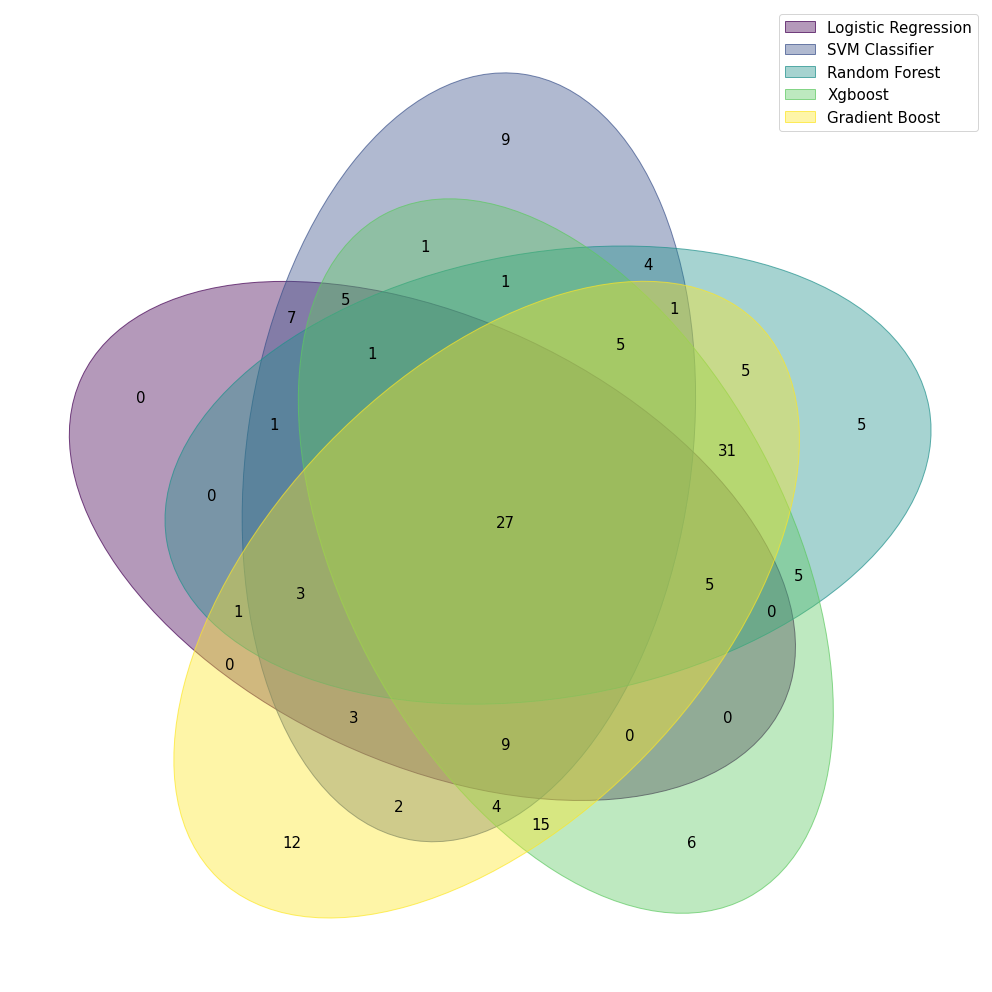

In [149]:
from venn import venn
from venn import pseudovenn

%matplotlib inline

set_LR_save = set(set_LR_save)
set_SVC_save = set(set_SVC_save)
set_RF_save = set(set_RF_save)
set_XGB_save = set(set_XGB_save)
set_GBC_save = set(set_GBC_save)


feature_plot={
    'Logistic Regression':set_LR_save,
    'SVM Classifier':set_SVC_save,
    'Random Forest':set_RF_save,
    'Xgboost':set_XGB_save,
    'Gradient Boost':set_GBC_save
}

venn(feature_plot,fontsize=15,figsize=(18,18),hint_hidden=False)

In [214]:
df_LR_save=pd.DataFrame(set_LR_save)
df_SVC_save=pd.DataFrame(set_SVC_save)
df_DT_save=pd.DataFrame(set_DT_save)
df_RF_save=pd.DataFrame(set_RF_save)
df_XGB_save=pd.DataFrame(set_XGB_save)
df_GBC_save=pd.DataFrame(set_GBC_save)
df_feature_5_models=pd.DataFrame(feature_5_models)

In [215]:
df_all_save=pd.concat([df_LR_save.reset_index(drop=True), df_SVC_save,df_DT_save,df_RF_save,df_XGB_save,df_GBC_save,df_feature_5_models], axis=1)

In [216]:
df_all_save

,0,0,0,0,0,0,0
0,BW,C7DC,Trp,PCaaC366,PCaaC366,PCaaC366,BW
1,DM,lysoPCaC204,PCaeC361,UA,UA,UA,Pro
2,Pro,Pro,HsCRP,C7DC,C7DC,C7DC,HDL
3,HDL,Asn,Val,lysoPCaC204,HeartRate,lysoPCaC204,PCaaC364
4,Asn,PCaaC364,C182,Pro,lysoPCaC204,PCaeC422,HTN_drug
...,...,...,...,...,...,...,...
118,NaN,NaN,NaN,NaN,NaN,Asp,NaN
119,NaN,NaN,NaN,NaN,NaN,Phe,NaN
120,NaN,NaN,NaN,NaN,NaN,lysoPCaC203,NaN
121,NaN,NaN,NaN,NaN,NaN,PCaaC384,NaN


In [217]:
df_all_save.columns = ['Logistic_Regression', 'SVM','DecisionTree','RandomForest','XGBoost','GradientBoost','5_models_overlap']

In [219]:
df_all_save.to_csv("./new-data-220328/RFECV_gridscores//RFECV_features_all.txt",sep="\t")

# Select features by different methods (by RFE method)

In [152]:
# # 6 model overlap
print("Overlap features of 6 models is: %s" % feature_6_models)

# # Different models (Num. of features)
print("Optimal N of LR features is: %d" % selector_LR.n_features_)
print("Optimal N of SVC features is: %d" % selector_SVC.n_features_)
print("Optimal N of DT features is: %d" % selector_DT.n_features_)
print("Optimal N of RF features is: %d" % selector_RF.n_features_)
print("Optimal N of XGB features is: %d" % selector_XGB.n_features_)
print("Optimal N of GBC features is: %d" % selector_GBC.n_features_)

# # Different models (AUC of features)
print("Optimal AUC of LR features is : %f" % avg_LR.max())
print("Optimal AUC of SVC features is : %f" % avg_SVC.max())
print("Optimal AUC of DT features is : %f" % avg_DT.max())
print("Optimal AUC of RF features is : %f" % avg_RF.max())
print("Optimal AUC of XGB features is : %f" % avg_XGB.max())
print("Optimal AUC of GBC features is : %f" % avg_GBC.max())

Overlap features of 6 models is: {'Trp', 'C4', 'HTN_drug', 'BMI', 'Kynurenine', 'C182'}
Optimal N of LR features is: 62
Optimal N of SVC features is: 83
Optimal N of DT features is: 183
Optimal N of RF features is: 183
Optimal N of XGB features is: 115
Optimal N of GBC features is: 156
Optimal AUC of LR features is : 0.901003
Optimal AUC of SVC features is : 0.883022
Optimal AUC of DT features is : 0.726200
Optimal AUC of RF features is : 0.891653
Optimal AUC of XGB features is : 0.871323
Optimal AUC of GBC features is : 0.889249


In [153]:
# set_LR
# set_SVC
# set_DT
# set_RF
# set_XGB
# set_GBC
# feature_6_models

# Get Ready data (After model feature selection)

In [452]:
set_LR={'Ala','Alcohol','Asn','BMI','BW','C0', 'C10', 'C12DC', 'C141','C142OH','C182','C2','C3','C4','C41','C5','C6C41DC',
        'C8','CHOL','Cit','Creatinine','DBP','DM','DM_drug','HDL','HT','HTN_drug','Kynurenine','LDL','Lipid_drug','Lys',
        'PCaaC300','PCaaC360','PCaaC364','PCaaC365','PCaaC404','PCaaC406','PCaaC422','PCaaC424','PCaeC302','PCaeC342','PCaeC360',
        'PCaeC362','PCaeC383','PCaeC405','PCaeC424','Phe','Pro','SMC180','SMC181','SMC241','SMOHC161','SMOHC221','SMOHC222',
        'Sarcosine','Ser','Smoking','Thr','Trp','age','lysoPCaC260', 'lysoPCaC281'}

In [453]:
feature_6_models={'Trp', 'Kynurenine', 'BMI', 'C182', 'C4', 'HTN_drug'}

In [454]:
feature_5_models={'BW', 'Pro', 'HDL', 'PCaaC364', 'HTN_drug', 'C4', 'Ser', 'Lipid_drug', 'LDL', 'C141', 'Creatinine', 'Trp', 'C0', 'PCaaC406', 'SMOHC161', 'Sarcosine', 'C3', 'C10', 'DBP', 'C182', 'C8', 'age', 'Phe', 'BMI', 'Kynurenine', 'DM', 'CHOL'}

In [455]:
len(set_LR),len(feature_6_models),len(feature_5_models)

(62, 6, 27)

In [456]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [457]:
X_train_final=X_train[set_LR]
X_test_final=X_test[set_LR]
y_train_final=y_train
y_test_final=y_test

In [458]:
#X_train_final

In [459]:
X_train_final.columns.array

<PandasArray>
[         'BW',          'DM',         'Pro',         'HDL',         'Asn',
         'Cit',         'Lys',    'PCaaC364',    'HTN_drug',          'C2',
    'PCaeC424',          'C4',      'SMC181',         'Ser',      'SMC180',
  'Lipid_drug',    'PCaeC302',         'LDL',        'C141',     'C6C41DC',
      'SMC241',    'PCaeC383',          'C5',  'Creatinine',         'Thr',
     'Alcohol',     'DM_drug',         'Trp',          'C0',         'C41',
    'PCaaC406',    'PCaeC360',    'SMOHC161',          'C3',    'PCaeC362',
   'Sarcosine',    'PCaaC422',         'C10',    'PCaaC300',         'Ala',
 'lysoPCaC281',    'PCaeC342',    'PCaaC360',    'PCaaC404',         'DBP',
          'HT',        'C182',    'SMOHC221',     'Smoking',      'C142OH',
          'C8',    'PCaeC405',    'PCaaC424',    'PCaaC365',         'age',
         'Phe',         'BMI',  'Kynurenine', 'lysoPCaC260',    'SMOHC222',
       'C12DC',        'CHOL']
Length: 62, dtype: object

# Receiver Operating Characteristic (ROC) with cross validation  (After model feature selection)

In [460]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [461]:
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [462]:
X_cv_final = X_train_final
y_cv_final = y_train_final

In [463]:
X_cv_nmp_final=X_cv_final.to_numpy()
y_cv_nmp_final=y_cv_final.to_numpy()

In [464]:
len(X_cv_nmp_final),len(y_cv_nmp_final)

(287, 287)

# Logistic Regression (After model feature selection)

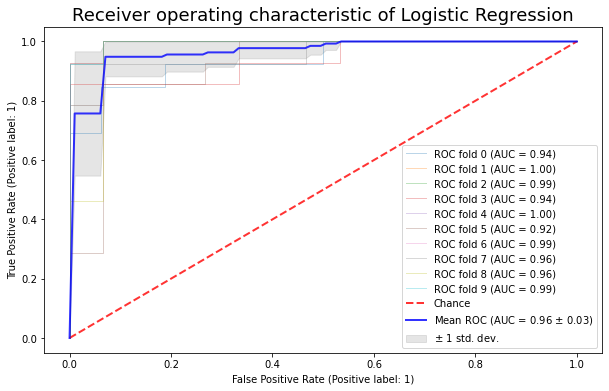

In [465]:
# LogisticRegression
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_LR_final = LogisticRegression(max_iter=3000)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (train, test) in enumerate(cv.split(X_cv_nmp_final, y_cv_nmp_final)):
    classifier_LR_final.fit(X_cv_nmp_final[train], y_cv_nmp_final[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_LR_final,
        X_cv_nmp_final[test],
        y_cv_nmp_final[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of LogisticRegression",
)
ax.set_title('Receiver operating characteristic of Logistic Regression',fontsize= 18)
ax.legend(loc="lower right")

plt.show()

In [466]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_LR_cv_final = LogisticRegression(max_iter=3000)
classifier_LR_final = LogisticRegression(max_iter=3000)
scoring=['accuracy','roc_auc','recall','precision','f1']
#scores_LR_cv_final = cross_validate(classifier_LR_cv_final,X_cv_nmp_final,y_cv_nmp_final,cv=10,scoring=scoring)
scores_LR_cv_final = cross_validate(classifier_LR_final,X_cv_nmp_final,y_cv_nmp_final,cv=10,scoring=scoring)
#print(sorted(scores_LR_cv.keys()))
#print(scores_LR_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_LR_cv_final['test_accuracy'].mean(),scores_LR_cv_final['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_LR_cv_final['test_roc_auc'].mean(),scores_LR_cv_final['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_LR_cv_final['test_recall'].mean(),scores_LR_cv_final['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_LR_cv_final['test_precision'].mean(),scores_LR_cv_final['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_LR_cv_final['test_f1'].mean(),scores_LR_cv_final['test_f1'].std()*2))

10 fold Accuracy: 0.93 (± 0.06)
10 fold AUC: 0.97 (± 0.05)
10 fold Recall: 0.91 (± 0.14)
10 fold Precision: 0.93 (± 0.10)
10 fold f1: 0.92 (± 0.08)


Accuracy (overall correct predictions): 0.82
Auc: 0.92
Recall (all 1s predicted right): 0.7
Precision (confidence when predicting a 1): 0.97
Detail:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        32
           1       0.97      0.70      0.81        40

    accuracy                           0.82        72
   macro avg       0.84      0.83      0.82        72
weighted avg       0.86      0.82      0.82        72



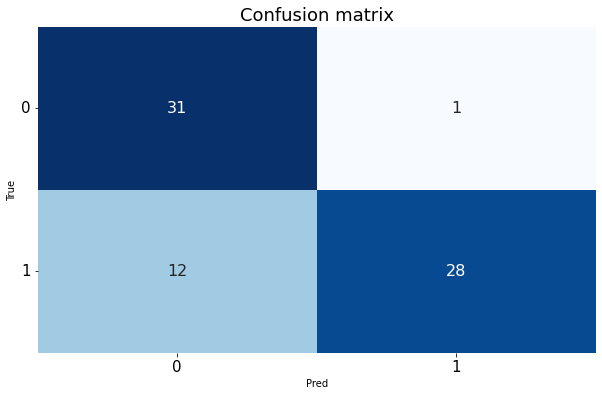

In [467]:
#############################################################

## train
classifier_LR_final.fit(X_train_final, y_train_final)

## test
predicted_prob_LR_final = classifier_LR_final.predict_proba(X_test_final)[:,1]
predicted = classifier_LR_final.predict(X_test_final)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test_final, predicted)
auc_test = metrics.roc_auc_score(y_test_final, predicted_prob_LR_final)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test_final, predicted)
precision = metrics.precision_score(y_test_final, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test_final, predicted, target_names=[str(i) for i in np.unique(y_test_final)]))

##############################################################

classes = np.unique(y_test_final)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test_final, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

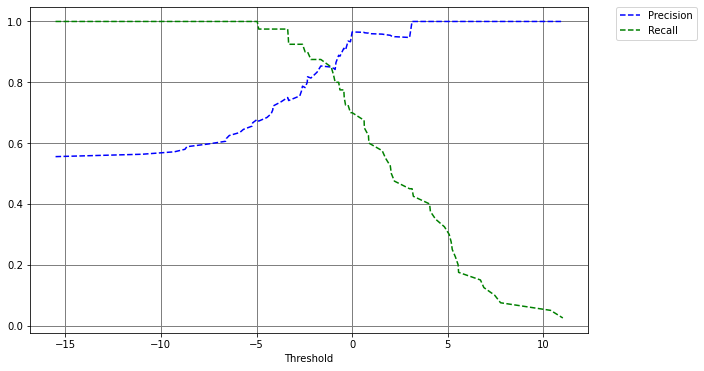

Best Threshold=-1.635653, F-Score=0.864
When Threshold = 0: (defalt)
When Threshold=0, the confusion matrix is:
 [[31  1]
 [12 28]]
When Threshold=0, the precision is: 0.9655172413793104
When Threshold=0, the recall is: 0.7
When Threshold = -1.635653:
When Threshold= -1.635653, the confusion matrix is:
 [[26  6]
 [ 6 34]]
When Threshold= -1.635653, the precision is: 0.85
When Threshold= -1.635653, the recall is: 0.85


In [470]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from numpy import argmax

# Plot the precision recall curve

classifier_LR_final.fit(X_train_final, y_train_final)
decision_scores = classifier_LR_final.decision_function(X_test_final)

precisions, recalls, thresholds = precision_recall_curve(y_test_final, decision_scores)

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.figure(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    #plt.scatter(recalls[:-1],precisions[:-1], marker='o', color='black', label='Best')
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

# convert to f score
fscore = (2 * precisions * recalls) / (precisions + recalls)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print("=====================================")


# Change threshold

## threshold = 0
predicted_1 = classifier_LR_final.predict(X_test_final)
print("When Threshold = 0: (defalt)")
print("When Threshold=0, the confusion matrix is:\n", confusion_matrix(y_test_final, predicted_1))
print("When Threshold=0, the precision is:",precision_score(y_test_final, predicted_1))
print("When Threshold=0, the recall is:",recall_score(y_test_final, predicted_1))
print("=====================================")

## threshold = -2.185215 (27 feature)
## threshold = -1.635653 (27 feature)
decision_score = classifier_LR_final.decision_function(X_test_final)
predicted_2 = np.array(decision_score >= -1.635653, dtype='int')
print("When Threshold = %f:" % thresholds[ix])
print("When Threshold= -1.635653, the confusion matrix is:\n",confusion_matrix(y_test_final, predicted_2))
print("When Threshold= -1.635653, the precision is:",precision_score(y_test_final, predicted_2))
print("When Threshold= -1.635653, the recall is:",recall_score(y_test_final, predicted_2))

# SVM Classifier (After model feature selection)

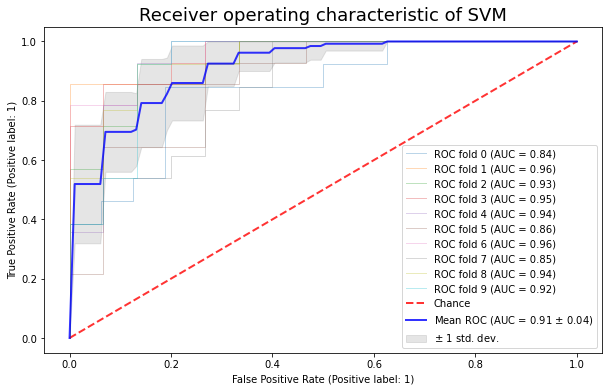

In [471]:
# LogisticRegression
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_SVC_final = SVC(kernel='rbf',probability=True , class_weight = 'balanced')
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (train, test) in enumerate(cv.split(X_cv_nmp_final, y_cv_nmp_final)):
    classifier_SVC_final.fit(X_cv_nmp_final[train], y_cv_nmp_final[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_SVC_final,
        X_cv_nmp_final[test],
        y_cv_nmp_final[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of SVM",
)
ax.set_title('Receiver operating characteristic of SVM',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [472]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_SVC_cv_final = SVC(kernel='rbf',probability=True , class_weight = 'balanced')
classifier_SVC_final = SVC(kernel='rbf',probability=True , class_weight = 'balanced')
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_SVC_cv_final = cross_validate(classifier_SVC_final,X_cv_nmp_final,y_cv_nmp_final,cv=10,scoring=scoring)

#print(sorted(scores_SVC_cv.keys()))
#print(scores_SVC_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_SVC_cv_final['test_accuracy'].mean(),scores_SVC_cv_final['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_SVC_cv_final['test_roc_auc'].mean(),scores_SVC_cv_final['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_SVC_cv_final['test_recall'].mean(),scores_SVC_cv_final['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_SVC_cv_final['test_precision'].mean(),scores_SVC_cv_final['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_SVC_cv_final['test_f1'].mean(),scores_SVC_cv_final['test_f1'].std()*2))

10 fold Accuracy: 0.83 (± 0.10)
10 fold AUC: 0.91 (± 0.09)
10 fold Recall: 0.83 (± 0.15)
10 fold Precision: 0.82 (± 0.14)
10 fold f1: 0.82 (± 0.11)


Accuracy (overall correct predictions): 0.81
Auc: 0.92
Recall (all 1s predicted right): 0.7
Precision (confidence when predicting a 1): 0.93
Detail:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        32
           1       0.93      0.70      0.80        40

    accuracy                           0.81        72
   macro avg       0.82      0.82      0.81        72
weighted avg       0.84      0.81      0.80        72



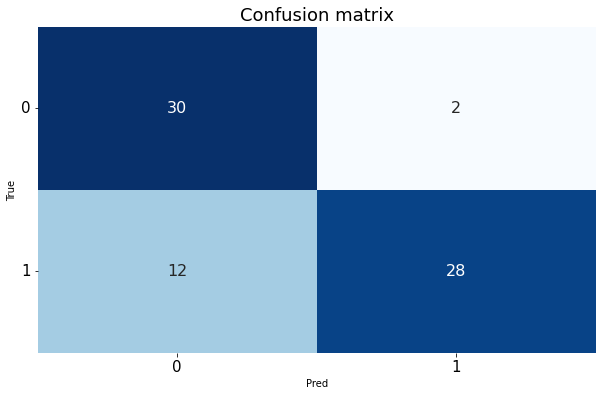

In [473]:
#############################################################

## train
classifier_SVC_final.fit(X_train_final, y_train_final)
## test
predicted_prob_SVC_final = classifier_SVC_final.predict_proba(X_test_final)[:,1]
predicted = classifier_SVC_final.predict(X_test_final)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test_final, predicted)
auc_test = metrics.roc_auc_score(y_test_final, predicted_prob_SVC_final)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test_final, predicted)
precision = metrics.precision_score(y_test_final, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test_final, predicted, target_names=[str(i) for i in np.unique(y_test_final)]))

##############################################################

classes = np.unique(y_test_final)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test_final, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

# Decision Tree Classifier (After model feature selection)

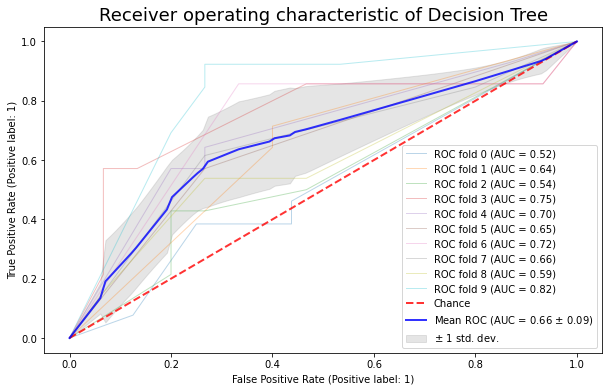

In [474]:
# DecisionTreeClassifier
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_DT_final = DecisionTreeClassifier(max_depth=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (train, test) in enumerate(cv.split(X_cv_nmp_final, y_cv_nmp_final)):
    classifier_DT_final.fit(X_cv_nmp_final[train], y_cv_nmp_final[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_DT_final,
        X_cv_nmp_final[test],
        y_cv_nmp_final[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of DecisionTree",
)
ax.set_title('Receiver operating characteristic of Decision Tree',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [475]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_DT_cv_final = DecisionTreeClassifier(max_depth=6)
classifier_DT_final = DecisionTreeClassifier(max_depth=6)
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_DT_cv_final = cross_validate(classifier_DT_final,X_cv_nmp_final,y_cv_nmp_final,cv=10,scoring=scoring)

#print(sorted(scores_DT_cv.keys()))
#print(scores_DT_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_DT_cv_final['test_accuracy'].mean(),scores_DT_cv_final['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_DT_cv_final['test_roc_auc'].mean(),scores_DT_cv_final['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_DT_cv_final['test_recall'].mean(),scores_DT_cv_final['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_DT_cv_final['test_precision'].mean(),scores_DT_cv_final['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_DT_cv_final['test_f1'].mean(),scores_DT_cv_final['test_f1'].std()*2))

10 fold Accuracy: 0.66 (± 0.13)
10 fold AUC: 0.65 (± 0.12)
10 fold Recall: 0.61 (± 0.19)
10 fold Precision: 0.65 (± 0.17)
10 fold f1: 0.62 (± 0.15)


Accuracy (overall correct predictions): 0.68
Auc: 0.6
Recall (all 1s predicted right): 0.52
Precision (confidence when predicting a 1): 0.84
Detail:
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        32
           1       0.84      0.53      0.65        40

    accuracy                           0.68        72
   macro avg       0.72      0.70      0.68        72
weighted avg       0.73      0.68      0.67        72



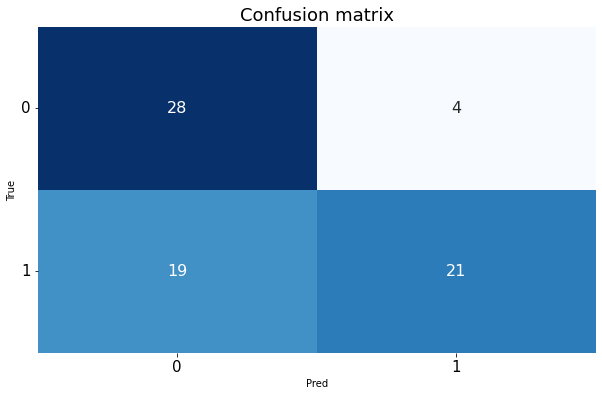

In [476]:
#############################################################

## train
classifier_DT_final.fit(X_train_final, y_train_final)
## test
predicted_prob_DT_final = classifier_DT_final.predict_proba(X_test_final)[:,1]
predicted = classifier_DT_final.predict(X_test_final)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test_final, predicted)
auc_test = metrics.roc_auc_score(y_test_final, predicted_prob_DT_final)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test_final, predicted)
precision = metrics.precision_score(y_test_final, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test_final, predicted, target_names=[str(i) for i in np.unique(y_test_final)]))

##############################################################

classes = np.unique(y_test_final)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test_final, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

|--- HTN_drug <= 0.50
|   |--- Smoking <= 0.50
|   |   |--- Kynurenine <= 1.22
|   |   |   |--- DBP <= -1.39
|   |   |   |   |--- Trp <= 0.66
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Trp >  0.66
|   |   |   |   |   |--- class: 0
|   |   |   |--- DBP >  -1.39
|   |   |   |   |--- PCaeC362 <= -1.30
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- PCaeC362 >  -1.30
|   |   |   |   |   |--- PCaaC406 <= 1.63
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- PCaaC406 >  1.63
|   |   |   |   |   |   |--- class: 0
|   |   |--- Kynurenine >  1.22
|   |   |   |--- class: 1
|   |--- Smoking >  0.50
|   |   |--- Trp <= -0.26
|   |   |   |--- PCaaC364 <= -0.56
|   |   |   |   |--- lysoPCaC260 <= -0.52
|   |   |   |   |   |--- Kynurenine <= 0.98
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Kynurenine >  0.98
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- lysoPCaC260 >  -0.52
|   |   |   |   |   |--- class: 0
|   |   |   |--- PCaaC364 >  

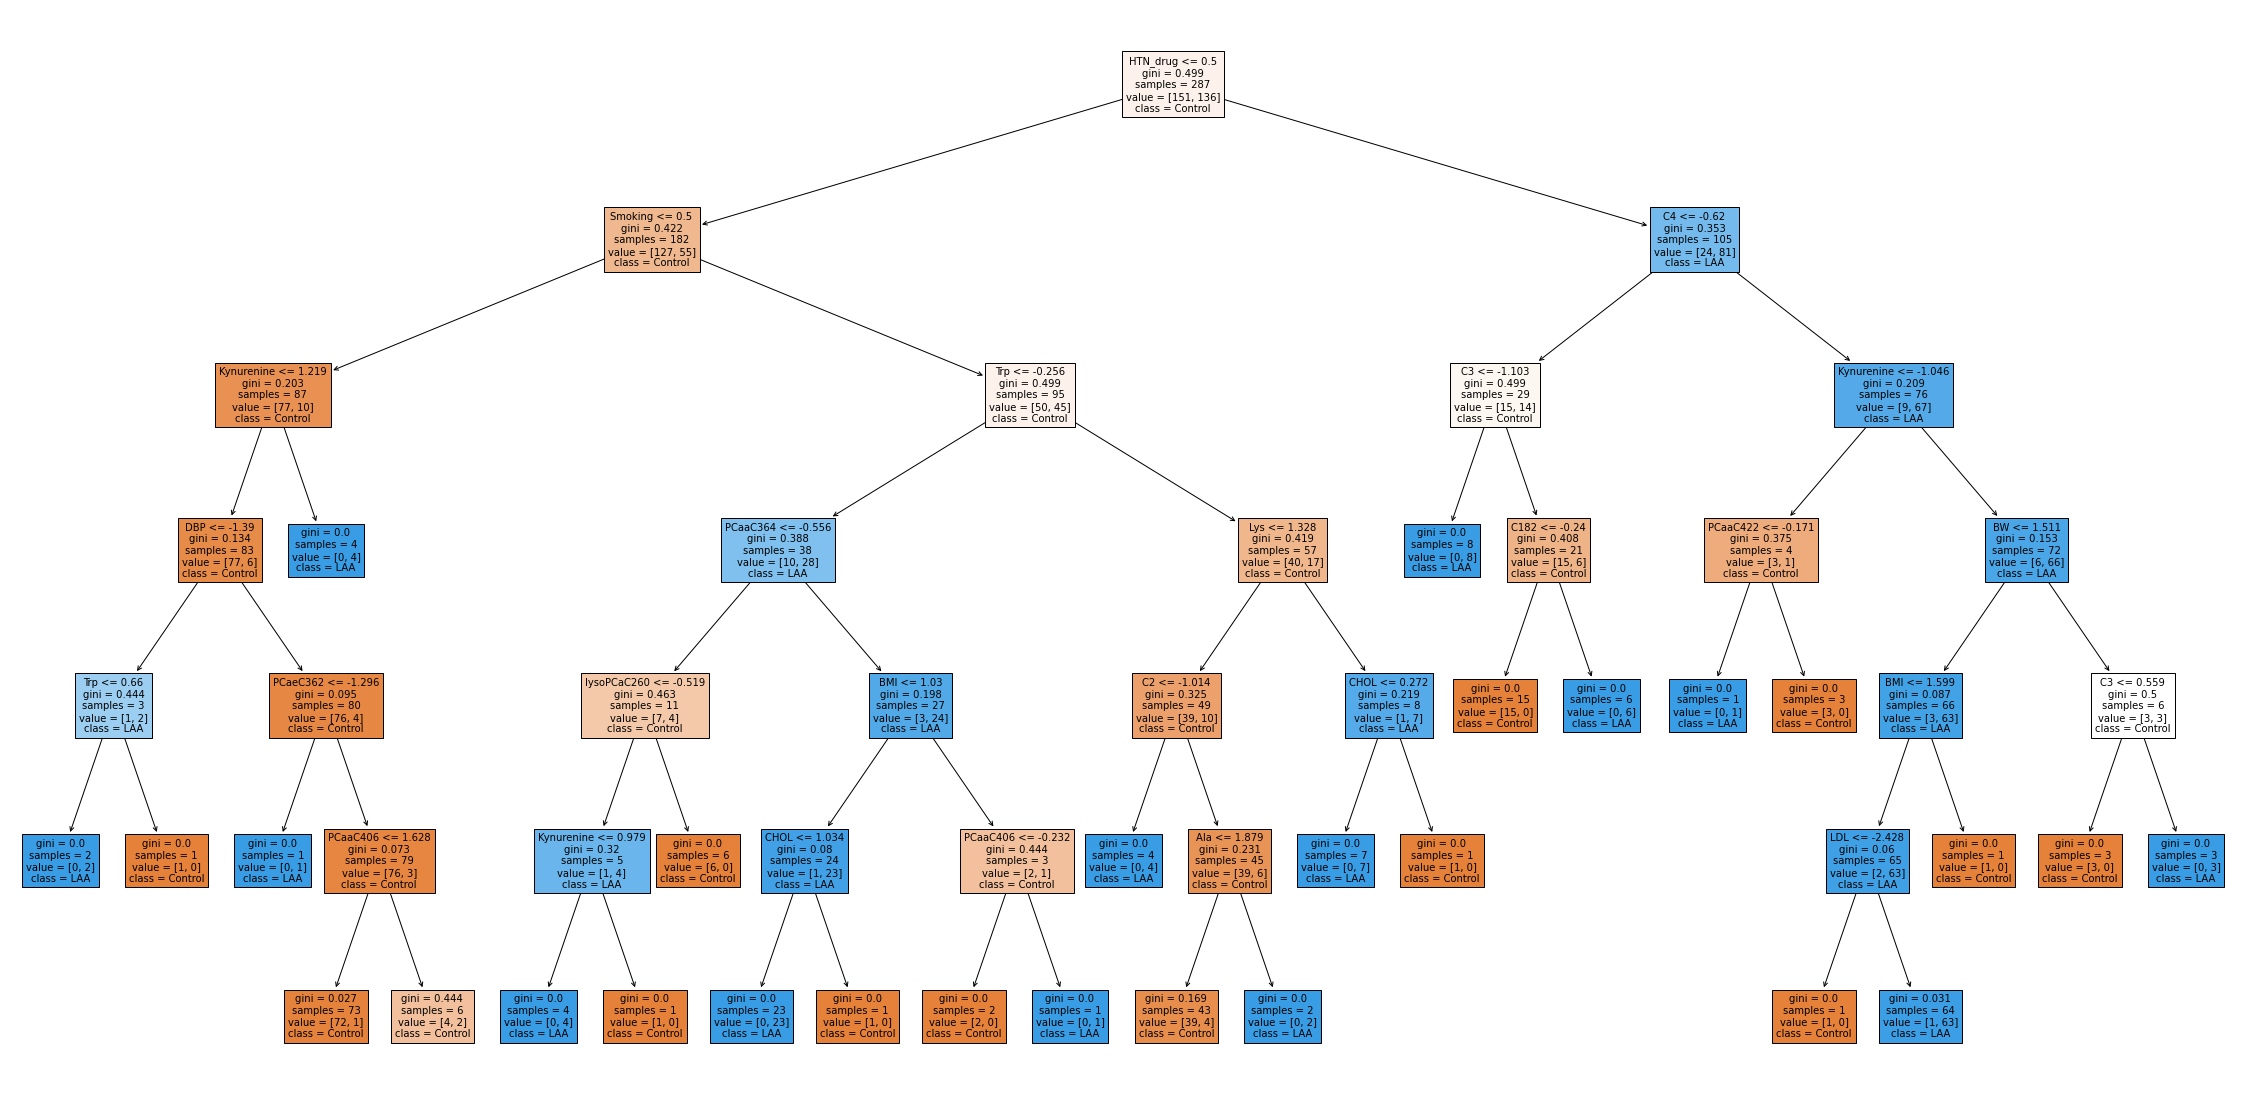

In [477]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

#feature name
feature_names = X_train_final.columns.values.tolist()

#class name
class_names=['Control','LAA']

text_representation = tree.export_text(classifier_DT_final,feature_names=feature_names)
print(text_representation)

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier_DT_final, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True,
                   fontsize=10)

# Random Forest Classifier (After model feature selection)

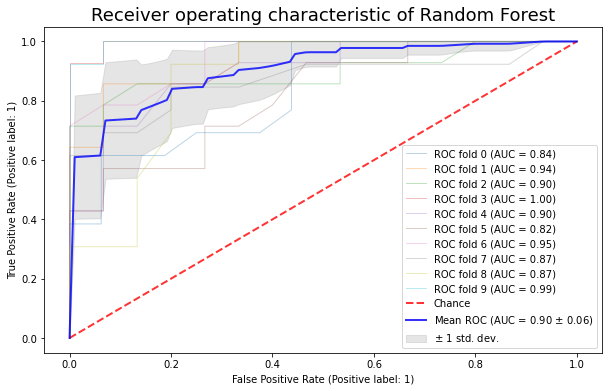

In [478]:
# RandomForestClassifier
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_RF_final = RandomForestClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (train, test) in enumerate(cv.split(X_cv_nmp_final, y_cv_nmp_final)):
    classifier_RF_final.fit(X_cv_nmp_final[train], y_cv_nmp_final[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_RF_final,
        X_cv_nmp_final[test],
        y_cv_nmp_final[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of Random Forest",
)
ax.set_title('Receiver operating characteristic of Random Forest',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [479]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_RF_cv_final = RandomForestClassifier()
classifier_RF_final = RandomForestClassifier()
scoring=['accuracy','roc_auc','recall','precision','f1']
scores_RF_cv_final = cross_validate(classifier_RF_final,X_cv_nmp_final,y_cv_nmp_final,cv=10,scoring=scoring)

#print(sorted(scores_RF_cv.keys()))
#print(scores_RF_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_RF_cv_final['test_accuracy'].mean(),scores_RF_cv_final['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_RF_cv_final['test_roc_auc'].mean(),scores_RF_cv_final['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_RF_cv_final['test_recall'].mean(),scores_RF_cv_final['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_RF_cv_final['test_precision'].mean(),scores_RF_cv_final['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_RF_cv_final['test_f1'].mean(),scores_RF_cv_final['test_f1'].std()*2))

10 fold Accuracy: 0.81 (± 0.18)
10 fold AUC: 0.89 (± 0.14)
10 fold Recall: 0.81 (± 0.25)
10 fold Precision: 0.80 (± 0.19)
10 fold f1: 0.80 (± 0.20)


Accuracy (overall correct predictions): 0.85
Auc: 0.89
Recall (all 1s predicted right): 0.8
Precision (confidence when predicting a 1): 0.91
Detail:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.91      0.80      0.85        40

    accuracy                           0.85        72
   macro avg       0.85      0.85      0.85        72
weighted avg       0.86      0.85      0.85        72



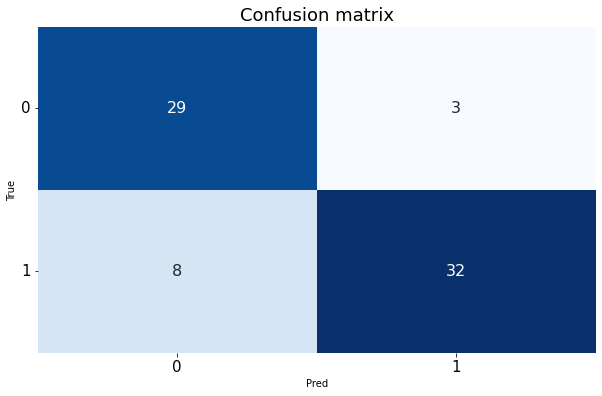

In [480]:
#############################################################

## train
classifier_RF_final.fit(X_train_final, y_train_final)
## test
predicted_prob_RF_final = classifier_RF_final.predict_proba(X_test_final)[:,1]
predicted = classifier_RF_final.predict(X_test_final)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test_final, predicted)
auc_test = metrics.roc_auc_score(y_test_final, predicted_prob_RF_final)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test_final, predicted)
precision = metrics.precision_score(y_test_final, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test_final, predicted, target_names=[str(i) for i in np.unique(y_test_final)]))

##############################################################

classes = np.unique(y_test_final)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test_final, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

Elapsed time to compute the importances: 0.014 seconds


<AxesSubplot:title={'center':'Feature Importance'}>

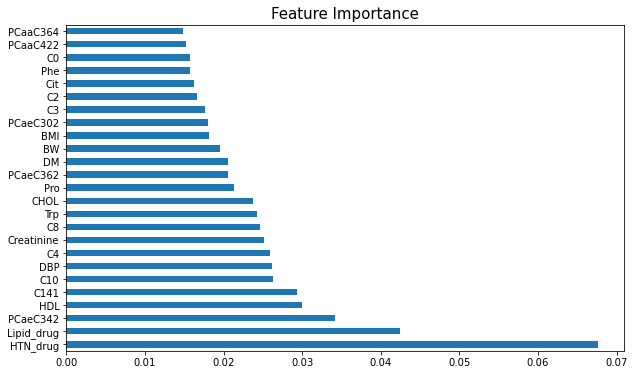

In [481]:
# Show all columns as list
feature_names = X_train_final.columns.values.tolist()
plt.figure(figsize=(10, 6))

plt.title('Feature Importance',fontsize= 15)

import time
import numpy as np

start_time = time.time()
importances = classifier_RF_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_RF_final.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)
forest_importances.nlargest(25).plot(kind='barh')


# XGB Classifier (After model feature selection)

In [482]:
#list(X_train_final.columns.values)

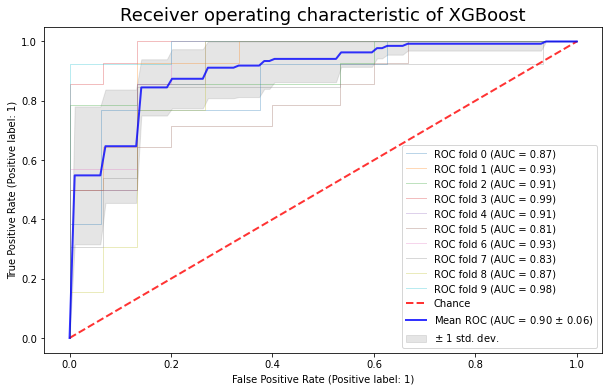

In [483]:
# RandomcolumnsestClassifier
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_XGB_final = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=None)
tprs = []
aucs = []

fig, ax = plt.subplots(figsize=(10, 6))

for i, (train, test) in enumerate(cv.split(X_cv_nmp_final, y_cv_nmp_final)):
    classifier_XGB_final.fit(X_cv_nmp_final[train], y_cv_nmp_final[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_XGB_final,
        X_cv_nmp_final[test],
        y_cv_nmp_final[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of XGBoost",
)
ax.set_title('Receiver operating characteristic of XGBoost',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [484]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
# classifier_XGB_cv_final = XGBClassifier(objective='binary:logistic',
#                           booster='gbtree',
#                           eval_metric='auc',
#                           tree_method='hist',
#                           grow_policy='lossguide',
#                           use_label_encoder=None)

classifier_XGB_final = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=None)

scoring=['accuracy','roc_auc','recall','precision','f1']

scores_XGB_cv_final = cross_validate(classifier_XGB_final,X_cv_nmp_final,y_cv_nmp_final,cv=10,scoring=scoring)

#print(sorted(scores_XGB_cv.keys()))
#print(scores_XGB_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_XGB_cv_final['test_accuracy'].mean(),scores_XGB_cv_final['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_XGB_cv_final['test_roc_auc'].mean(),scores_XGB_cv_final['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_XGB_cv_final['test_recall'].mean(),scores_XGB_cv_final['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_XGB_cv_final['test_precision'].mean(),scores_XGB_cv_final['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_XGB_cv_final['test_f1'].mean(),scores_XGB_cv_final['test_f1'].std()*2))

10 fold Accuracy: 0.82 (± 0.14)
10 fold AUC: 0.90 (± 0.11)
10 fold Recall: 0.80 (± 0.29)
10 fold Precision: 0.82 (± 0.14)
10 fold f1: 0.80 (± 0.18)


Accuracy (overall correct predictions): 0.85
Auc: 0.91
Recall (all 1s predicted right): 0.78
Precision (confidence when predicting a 1): 0.94
Detail:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.94      0.78      0.85        40

    accuracy                           0.85        72
   macro avg       0.85      0.86      0.85        72
weighted avg       0.86      0.85      0.85        72



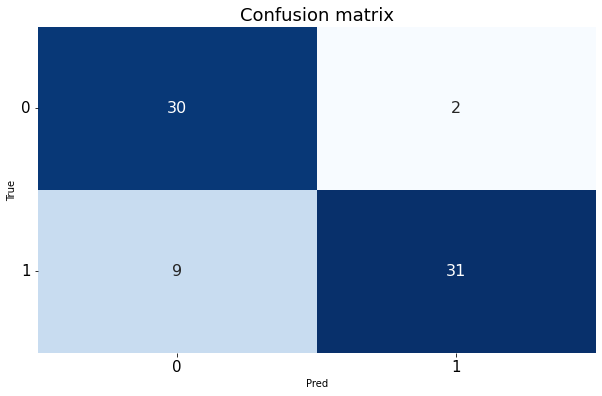

In [485]:
#############################################################

## train
classifier_XGB_final.fit(X_train_final, y_train_final)
## test
predicted_prob_XGB_final = classifier_XGB_final.predict_proba(X_test_final)[:,1]
predicted = classifier_XGB_final.predict(X_test_final)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test_final, predicted)
auc_test = metrics.roc_auc_score(y_test_final, predicted_prob_XGB_final)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test_final, predicted)
precision = metrics.precision_score(y_test_final, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test_final, predicted, target_names=[str(i) for i in np.unique(y_test_final)]))

##############################################################

classes = np.unique(y_test_final)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test_final, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

# Gradient Boost (After model feature selection)

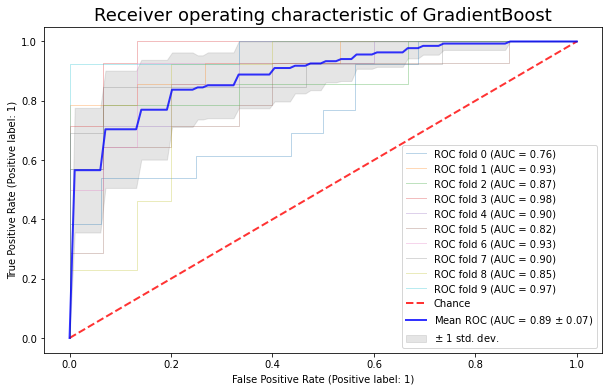

In [486]:
# Gradient Boost
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel="linear", probability=True)
classifier_GBC_final = GradientBoostingClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (train, test) in enumerate(cv.split(X_cv_nmp_final, y_cv_nmp_final)):
    classifier_GBC_final.fit(X_cv_nmp_final[train], y_cv_nmp_final[train])
    viz = RocCurveDisplay.from_estimator(
        classifier_GBC_final,
        X_cv_nmp_final[test],
        y_cv_nmp_final[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic of GradientBoost",
)
ax.set_title('Receiver operating characteristic of GradientBoost',fontsize= 18)
ax.legend(loc="lower right")
plt.show()

In [487]:
from sklearn.model_selection import cross_validate

# train with 10 fold corss validation
#classifier_GBC_cv_final = GradientBoostingClassifier()

classifier_GBC_final = GradientBoostingClassifier()

scoring=['accuracy','roc_auc','recall','precision','f1']

scores_GBC_cv_final = cross_validate(classifier_GBC_final,X_cv_nmp_final,y_cv_nmp_final,cv=10,scoring=scoring)

#print(sorted(scores_GBC_cv.keys()))
#print(scores_GBC_cv['test_recall_macro'])
print("10 fold Accuracy: %0.2f (± %0.2f)" % (scores_GBC_cv_final['test_accuracy'].mean(),scores_GBC_cv_final['test_accuracy'].std()*2))
print("10 fold AUC: %0.2f (± %0.2f)" % (scores_GBC_cv_final['test_roc_auc'].mean(),scores_GBC_cv_final['test_roc_auc'].std()*2))
print("10 fold Recall: %0.2f (± %0.2f)" % (scores_GBC_cv_final['test_recall'].mean(),scores_GBC_cv_final['test_recall'].std()*2))
print("10 fold Precision: %0.2f (± %0.2f)" % (scores_GBC_cv_final['test_precision'].mean(),scores_GBC_cv_final['test_precision'].std()*2))
print("10 fold f1: %0.2f (± %0.2f)" % (scores_GBC_cv_final['test_f1'].mean(),scores_GBC_cv_final['test_f1'].std()*2))

10 fold Accuracy: 0.82 (± 0.13)
10 fold AUC: 0.89 (± 0.12)
10 fold Recall: 0.75 (± 0.27)
10 fold Precision: 0.85 (± 0.15)
10 fold f1: 0.79 (± 0.17)


Accuracy (overall correct predictions): 0.75
Auc: 0.89
Recall (all 1s predicted right): 0.62
Precision (confidence when predicting a 1): 0.89
Detail:
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        32
           1       0.89      0.62      0.74        40

    accuracy                           0.75        72
   macro avg       0.78      0.77      0.75        72
weighted avg       0.79      0.75      0.75        72



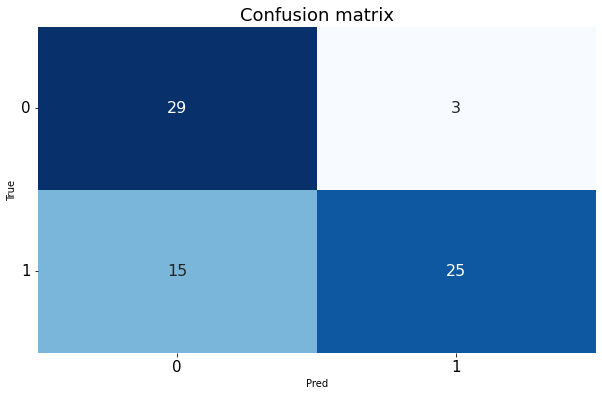

In [488]:
#############################################################

## train
classifier_GBC_final.fit(X_train_final, y_train_final)

## test
predicted_prob_GBC_final = classifier_GBC_final.predict_proba(X_test_final)[:,1]
predicted = classifier_GBC_final.predict(X_test_final)

#############################################################

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test_final, predicted)
auc_test = metrics.roc_auc_score(y_test_final, predicted_prob_GBC_final)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc_test,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test_final, predicted)
precision = metrics.precision_score(y_test_final, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test_final, predicted, target_names=[str(i) for i in np.unique(y_test_final)]))

##############################################################

classes = np.unique(y_test_final)
fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_test_final, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,annot_kws={"size": 16})
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_title('Confusion matrix',fontsize= 18)
ax.set_yticklabels(labels=classes, rotation=0,fontsize=15)
ax.set_xticklabels(labels=classes, rotation=0,fontsize=15)
plt.show()


##############################################################

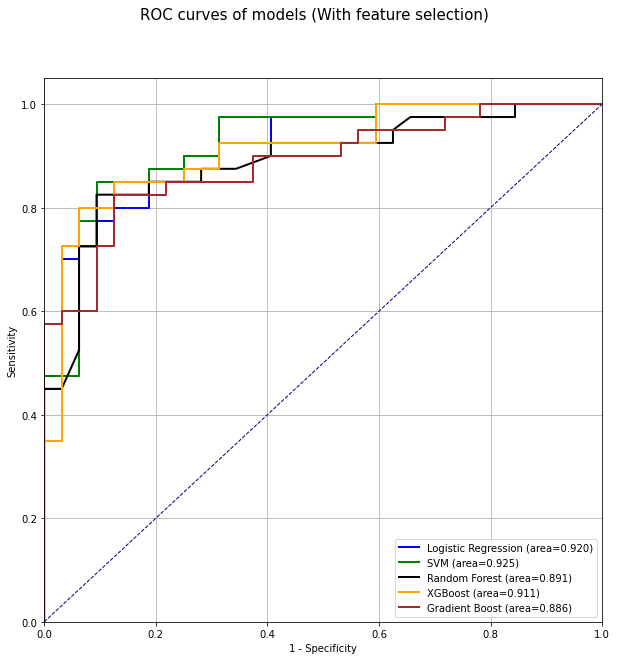

In [489]:
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 10})
plt.grid()


fpr, tpr, roc_auc = roc_curve_and_score(y_test_final, predicted_prob_LR_final)
plt.plot(fpr, tpr, color='blue', lw=2,
         label='Logistic Regression (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test_final, predicted_prob_SVC_final)
plt.plot(fpr, tpr, color='green', lw=2,
         label='SVM (area={0:.3f})'.format(roc_auc))
# fpr, tpr, roc_auc = roc_curve_and_score(y_test_final, predicted_prob_DT_final)
# plt.plot(fpr, tpr, color='red', lw=2,
#          label='Decision Tree (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test_final, predicted_prob_RF_final)
plt.plot(fpr, tpr, color='black', lw=2,
         label='Random Forest (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test_final, predicted_prob_XGB_final)
plt.plot(fpr, tpr, color='orange', lw=2,
         label='XGBoost (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test_final, predicted_prob_GBC_final)
plt.plot(fpr, tpr, color='brown', lw=2,
         label='Gradient Boost (area={0:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.suptitle('ROC curves of models (With feature selection)',fontsize=15)
plt.show()

# Final All features form RFE

In [349]:
# # 6 model overlap
print("Overlap features of 5 models is: %s " % feature_5_models)

# # Different models (Num. of features)
print("Optimal N of LR features is: %d" % selector_LR.n_features_)
print("Optimal N of SVC features is: %d" % selector_SVC.n_features_)
print("Optimal N of DT features is: %d" % selector_DT.n_features_)
print("Optimal N of RF features is: %d" % selector_RF.n_features_)
print("Optimal N of XGB features is: %d" % selector_XGB.n_features_)
print("Optimal N of GBC features is: %d" % selector_GBC.n_features_)

# # Different models (AUC of features)
print("Optimal AUC of LR features is : %f" % avg_LR.max())
print("Optimal AUC of SVC features is : %f" % avg_SVC.max())
print("Optimal AUC of DT features is : %f" % avg_DT.max())
print("Optimal AUC of RF features is : %f" % avg_RF.max())
print("Optimal AUC of XGB features is : %f" % avg_XGB.max())
print("Optimal AUC of GBC features is : %f" % avg_GBC.max())

Overlap features of 5 models is: ['BW', 'Pro', 'HDL', 'PCaaC364', 'HTN_drug', 'C4', 'Ser', 'Lipid_drug', 'LDL', 'C141', 'Creatinine', 'Trp', 'C0', 'PCaaC406', 'SMOHC161', 'Sarcosine', 'C3', 'C10', 'DBP', 'C182', 'C8', 'age', 'Phe', 'BMI', 'Kynurenine', 'DM', 'CHOL'] 
Optimal N of LR features is: 62
Optimal N of SVC features is: 83
Optimal N of DT features is: 183
Optimal N of RF features is: 183
Optimal N of XGB features is: 115
Optimal N of GBC features is: 156
Optimal AUC of LR features is : 0.901003
Optimal AUC of SVC features is : 0.883022
Optimal AUC of DT features is : 0.726200
Optimal AUC of RF features is : 0.891653
Optimal AUC of XGB features is : 0.871323
Optimal AUC of GBC features is : 0.889249
